# Dayly Data - Time Serie EDA

https://towardsdatascience.com/time-series-problems-simply-explained-as-fast-food-combo-meals-70c6eb9bdef

# <span style='background :khaki' > Install & Importa Libraries </span>

In [1]:
### ***Enviroment Preparation***
# Install Pandas
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install lightgbm

!pip install sktime
!pip install sklego

#!pip install skforecast

# Update pip -- WARNING Resolution
!python.exe -m pip install --upgrade pip

In [2]:
### ***Imports***
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from datetime import datetime
from datetime import timedelta

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss

import time
# Current Location.. !cd
#C:\Users\ghoyo\Desktop\TFM\Nuevo\Proyect

# Paths
data = r"C:\Users\ghoyo\Desktop\TFM 3.0\Project\GeneratedDfs\by_day.json"
data2 = r"C:\Users\ghoyo\Desktop\TFM 3.0\Project\GeneratedDfs\by_day_2.json"

#### <span style="background:skyblue"> Load and Inspect Data <span>

In [3]:
df = pd.read_json(data2)
df.shape

(2061, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2061 entries, 2017-04-04 to 2022-11-24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   day_n_streams    2061 non-null   int64
 1   week_day         2061 non-null   int64
 2   day_n_songs      2061 non-null   int64
 3   day_n_podcast    2061 non-null   int64
 4   day_new_stream   2061 non-null   int64
 5   day_new_song     2061 non-null   int64
 6   day_new_podcast  2061 non-null   int64
dtypes: int64(7)
memory usage: 128.8 KB


In [5]:
df.describe().T

count       mean        std  min   25%   50%   75%    max
day_n_streams    2061.0  39.800097  28.399624  0.0  20.0  35.0  53.0  247.0
week_day         2061.0   2.998544   1.999635  0.0   1.0   3.0   5.0    6.0
day_n_songs      2061.0  39.741388  28.401398  0.0  20.0  35.0  53.0  247.0
day_n_podcast    2061.0   0.058709   0.666791  0.0   0.0   0.0   0.0   22.0
day_new_stream   2061.0   6.515284   9.862028  0.0   0.0   3.0   9.0  106.0
day_new_song     2061.0   6.498787   9.855146  0.0   0.0   3.0   9.0  106.0
day_new_podcast  2061.0   0.016497   0.145213  0.0   0.0   0.0   0.0    2.0

In [6]:
df.head(8)

day_n_streams  week_day  day_n_songs  day_n_podcast  \
2017-04-04             66         1           66              0   
2017-04-05            123         2          123              0   
2017-04-06             63         3           63              0   
2017-04-07             45         4           45              0   
2017-04-08             56         5           56              0   
2017-04-09             36         6           36              0   
2017-04-10             73         0           73              0   
2017-04-11             18         1           18              0   

            day_new_stream  day_new_song  day_new_podcast  
2017-04-04               0             0                0  
2017-04-05               0             0                0  
2017-04-06               0             0                0  
2017-04-07               0             0                0  
2017-04-08               0             0                0  
2017-04-09               0             0                0  
2017-04-10               0             0                0  
2017-04-11               0             0                0

In [7]:
#TARGETS = df.columns  
TARGET = ['day_n_streams', 'day_n_songs', 'day_n_podcast', 'day_new_stream', 'day_new_song', 'day_new_podcast']

# <span style='background :khaki' > EDA </span>

### <span style="background:lightgreen"> Visualize Data <span>

#### <span style="background:skyblue"> Plot the data <span>

Text(0.5, 1.0, 'Number of New Podcasts listened each day')

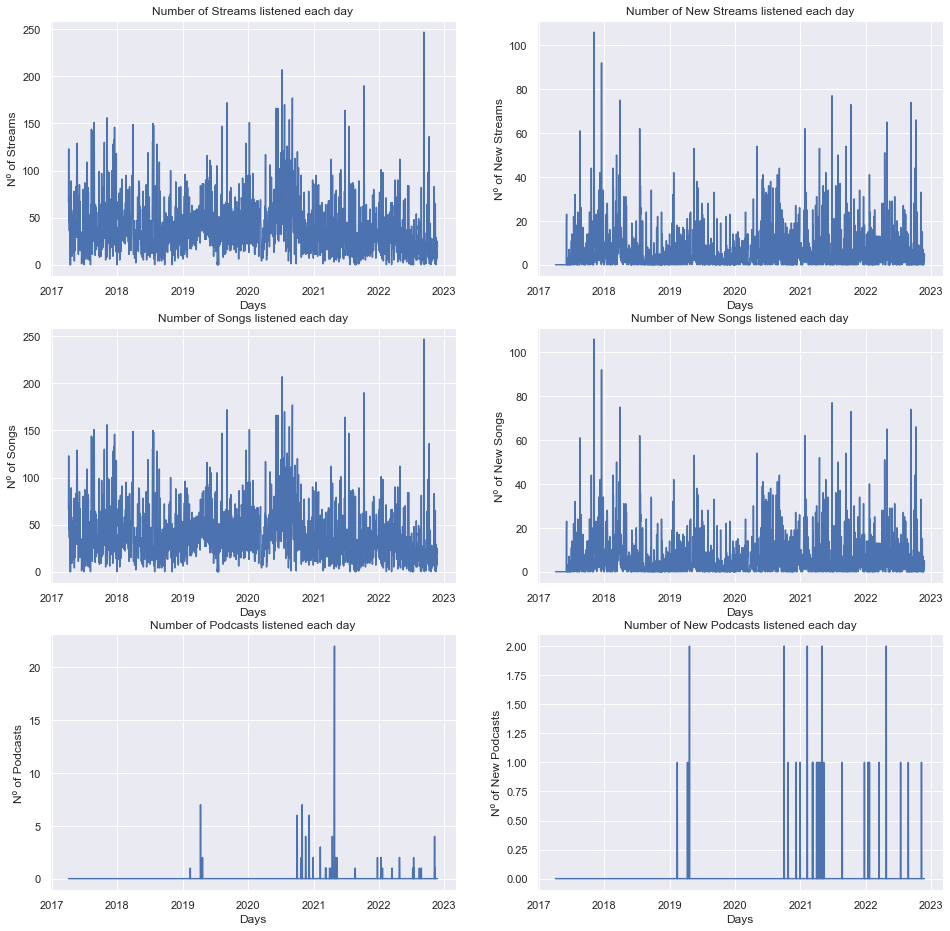

In [8]:
fig, ax = plt.subplots(3,2,figsize=(16,16))

#Plot Number of Streams Listened Each Day
ax[0][0].plot(df['day_n_streams'])
ax[0][0].set(xlabel = 'Days', ylabel = 'Nº of Streams')
ax[0][0].set_title("Number of Streams listened each day")

ax[0][1].plot(df['day_new_stream'])
ax[0][1].set(xlabel = 'Days', ylabel = 'Nº of New Streams')
ax[0][1].set_title("Number of New Streams listened each day")

ax[1][0].plot(df['day_n_songs'])
ax[1][0].set(xlabel = 'Days', ylabel = 'Nº of Songs')
ax[1][0].set_title("Number of Songs listened each day")

ax[1][1].plot(df['day_new_song'])
ax[1][1].set(xlabel = 'Days', ylabel = 'Nº of New Songs')
ax[1][1].set_title("Number of New Songs listened each day")

ax[2][0].plot(df['day_n_podcast'])
ax[2][0].set(xlabel = 'Days', ylabel = 'Nº of Podcasts')
ax[2][0].set_title("Number of Podcasts listened each day")

ax[2][1].plot(df['day_new_podcast'])
ax[2][1].set(xlabel = 'Days', ylabel = 'Nº of New Podcasts')
ax[2][1].set_title("Number of New Podcasts listened each day")


#### <span style="background:skyblue"> Plot Data with visual split by years <span>

<span style="background:violet"> V - Functions <span>

In [9]:
from typing import List, Tuple
import matplotlib.pyplot as plt


def set_plot_title(ax, op: str):
    if op == 'm':
        ax.set_title('describe by months')
    elif op == 'y':
        ax.set_title('describe by years')


def get_xcoords(df, op: str) -> List[Tuple[int, int, int]]:
    if op == 'm':
        return [d for d in df.index if(d.day == 1)]
    elif op == 'y':
        return [d for d in df.index if(d.day == 1 and d.month == 1)]


def analyse_by(df, op: str = 'y', target = TARGET) -> None:
    fig, ax = plt.subplots(2, 3, figsize=(24, 12))
    xcoords = get_xcoords(df, op)

    set_plot_title(ax[0][0], op)

    for i in range(2):
        for j in range(3):
            for xc in xcoords:
                ax[i][j].axvline(x=xc, color='black', linestyle='--')

    flag = 0
    for t,i in zip(target, range(len(target))):
        if i%3 == 1:
            flag = 1
        elif i%3 == 0:
            flag = 0
        elif i%3 == 2:
            flag=2
            
        if i<=2:
            ax[0][flag].plot(df[t])
            ax[0][flag].set(xlabel='Days', ylabel='Nº of: '+ t)
            ax[0][flag].set_title("Number of: "+ t+ " listened each day")
            flag = flag+1

        elif i<=5: 
            ax[1][flag].plot(df[t])
            ax[1][flag].set(xlabel='Days', ylabel='Nº of: '+ t)
            ax[1][flag].set_title("Number of: "+ t+ " listened each day")

def analyse_one_by(df, op='y', data='day_n_streams'):
    fig, ax = plt.subplots(figsize=(12,3))
    xcoords = get_xcoords(df, op)
    set_plot_title(ax, op)

    for xc in xcoords:
        ax.axvline(x=xc, color='black', linestyle='--')
    ax.plot(df[data])
    ax.set_ylabel('number of Streams/Songs/Podcasts')
    ax.set_xlabel('Days')

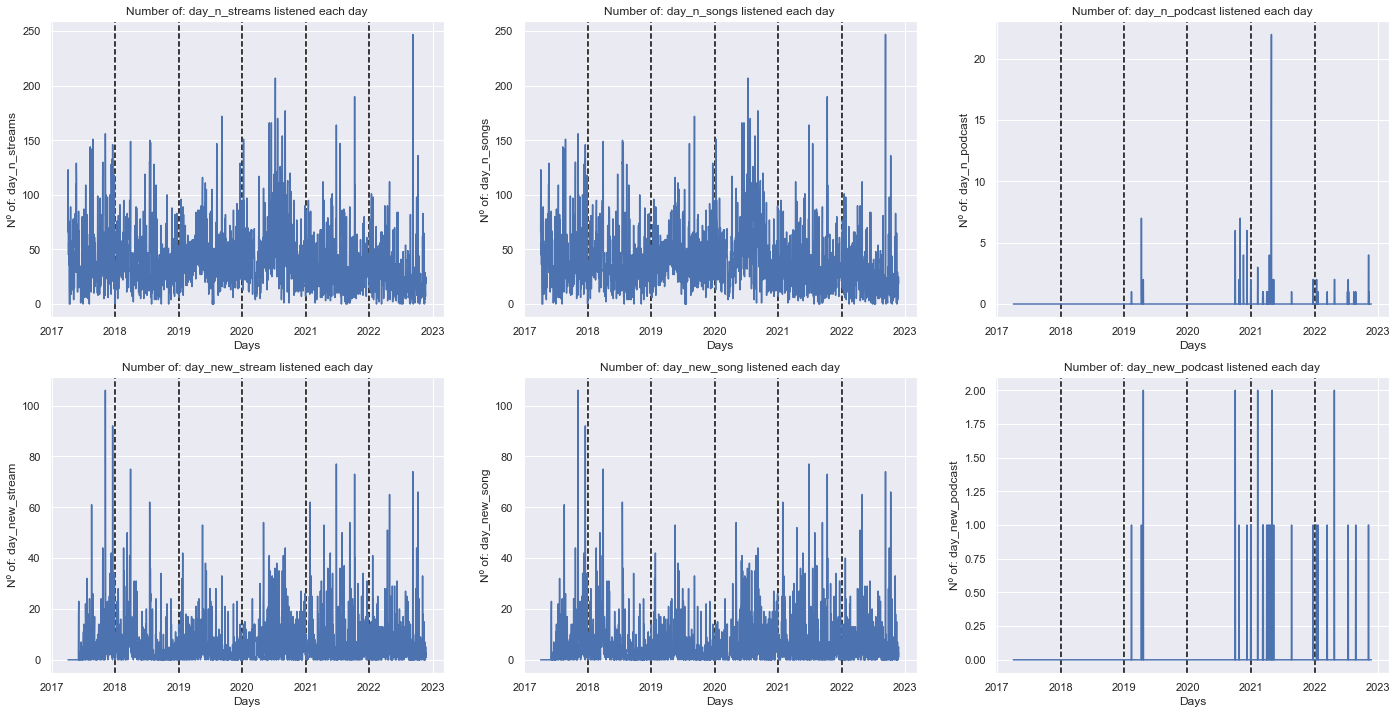

In [10]:
analyse_by(df, target =TARGET)

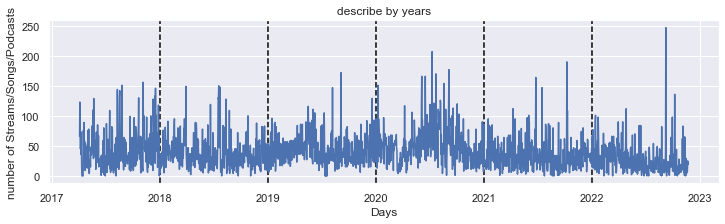

In [11]:
analyse_one_by(df)

# <span style='background :khaki' > Study Stationarity </span>

#### <span style="background:skyblue"> Rolling Mean <span>

<span style="background:violet"> RM - Functions <span>

In [142]:
def analyze_stationarity(timeseries, title, target):
    fig, ax = plt.subplots(3, 1, figsize=(20, 12))

    rolmean = pd.Series(timeseries).rolling(window='30D').mean() 
    rolstd = pd.Series(timeseries).rolling(window='30D').std()
    ax[0].plot(timeseries, label= title)
    ax[0].plot(rolmean, label='rolling mean');
    ax[0].plot(rolstd, label='rolling std (x10)');
    ax[0].set_title('30-day window')
    ax[0].legend()
    
    rolmean = pd.Series(timeseries).rolling(window='270D').mean() 
    rolstd = pd.Series(timeseries).rolling(window='270D').std()
    ax[1].plot(timeseries, label= title)
    ax[1].plot(rolmean, label='rolling mean');
    ax[1].plot(rolstd, label='rolling std (x10)');
    ax[1].set_title('365-day window')
    ax[1].legend()
    
    x = range(0, len(df.index))
    rolmean = [np.mean(df.loc[:x, i]) for x in df.index]
    rolstd = [np.std(df.loc[:x, i]) for x in df.index]
    ax[2].plot(x, timeseries, label= title)
    ax[2].plot(rolmean, label='rolling mean');
    ax[2].plot(rolstd, label='rolling std (x10)');
    ax[2].set_title('increasing day window')
    ax[2].legend()
    
    plt.show()

-------------------------------------------- day_n_streams --------------------------------------------------------------------


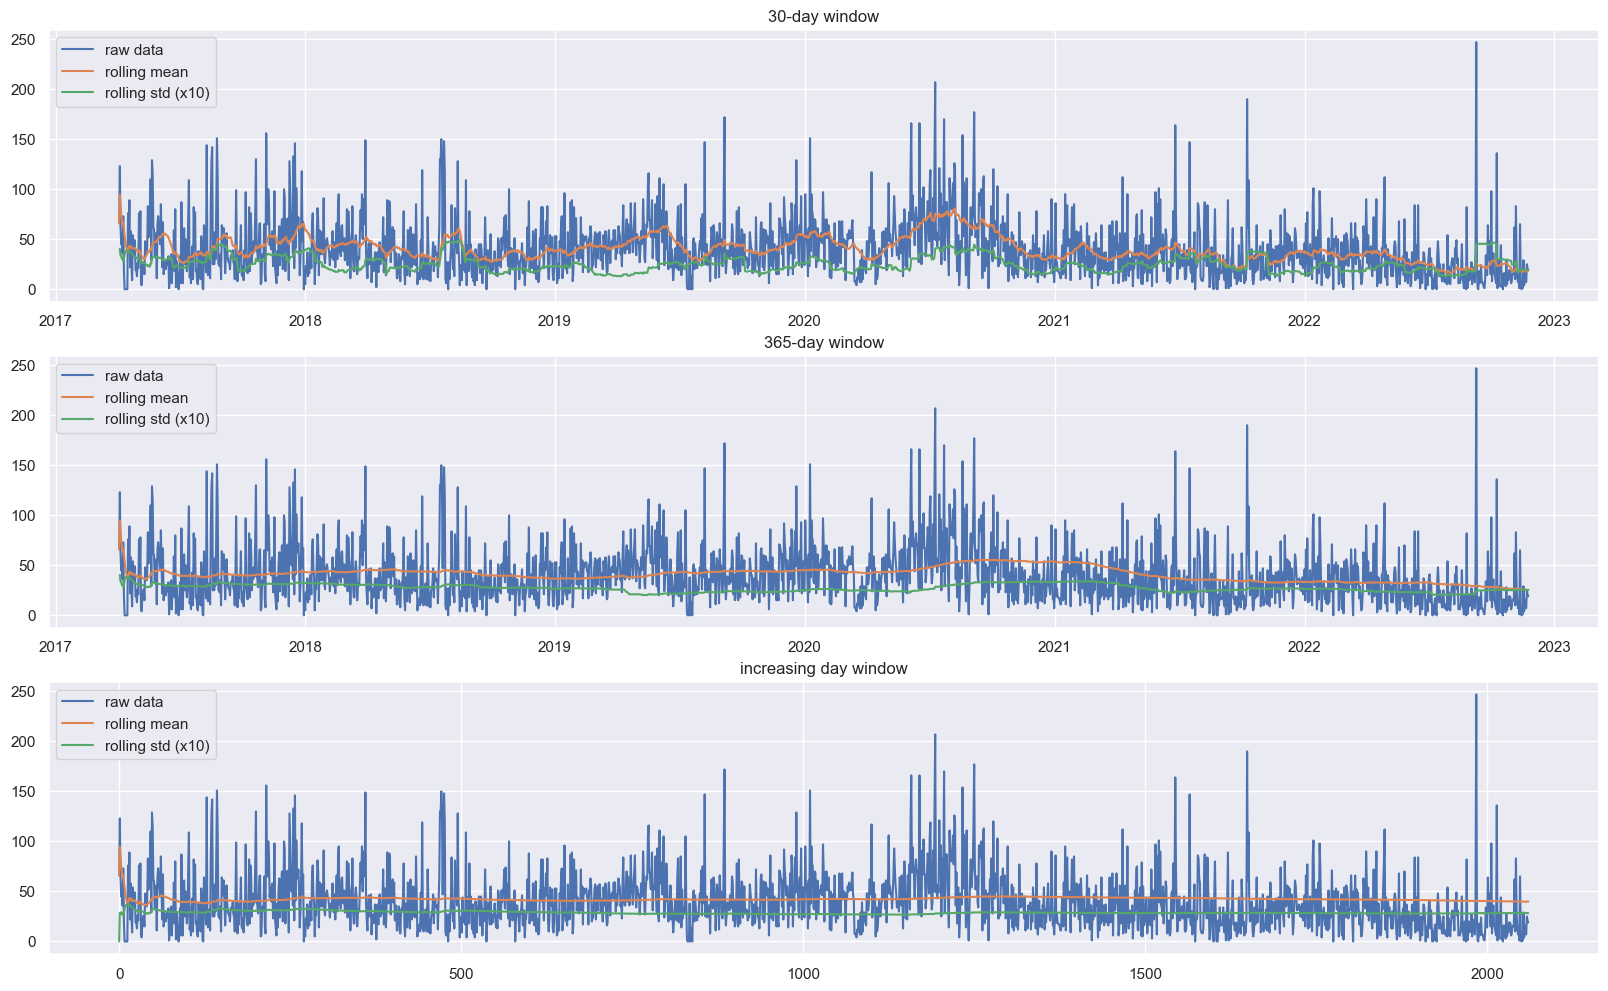

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- day_n_songs --------------------------------------------------------------------


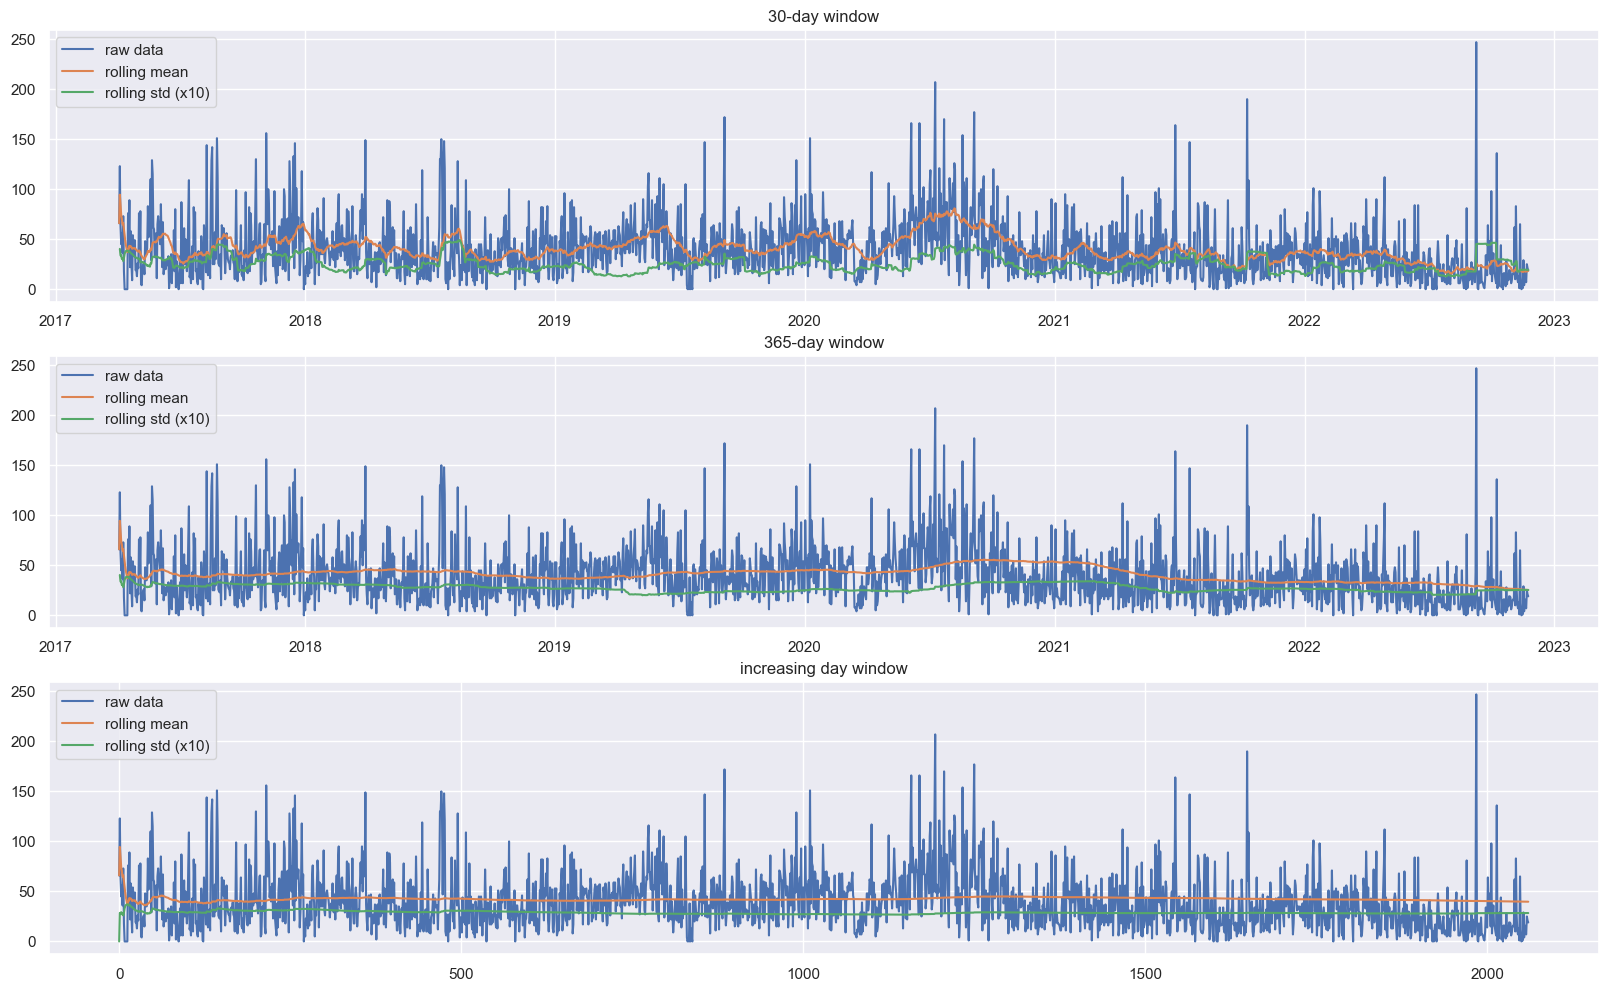

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- day_n_podcast --------------------------------------------------------------------


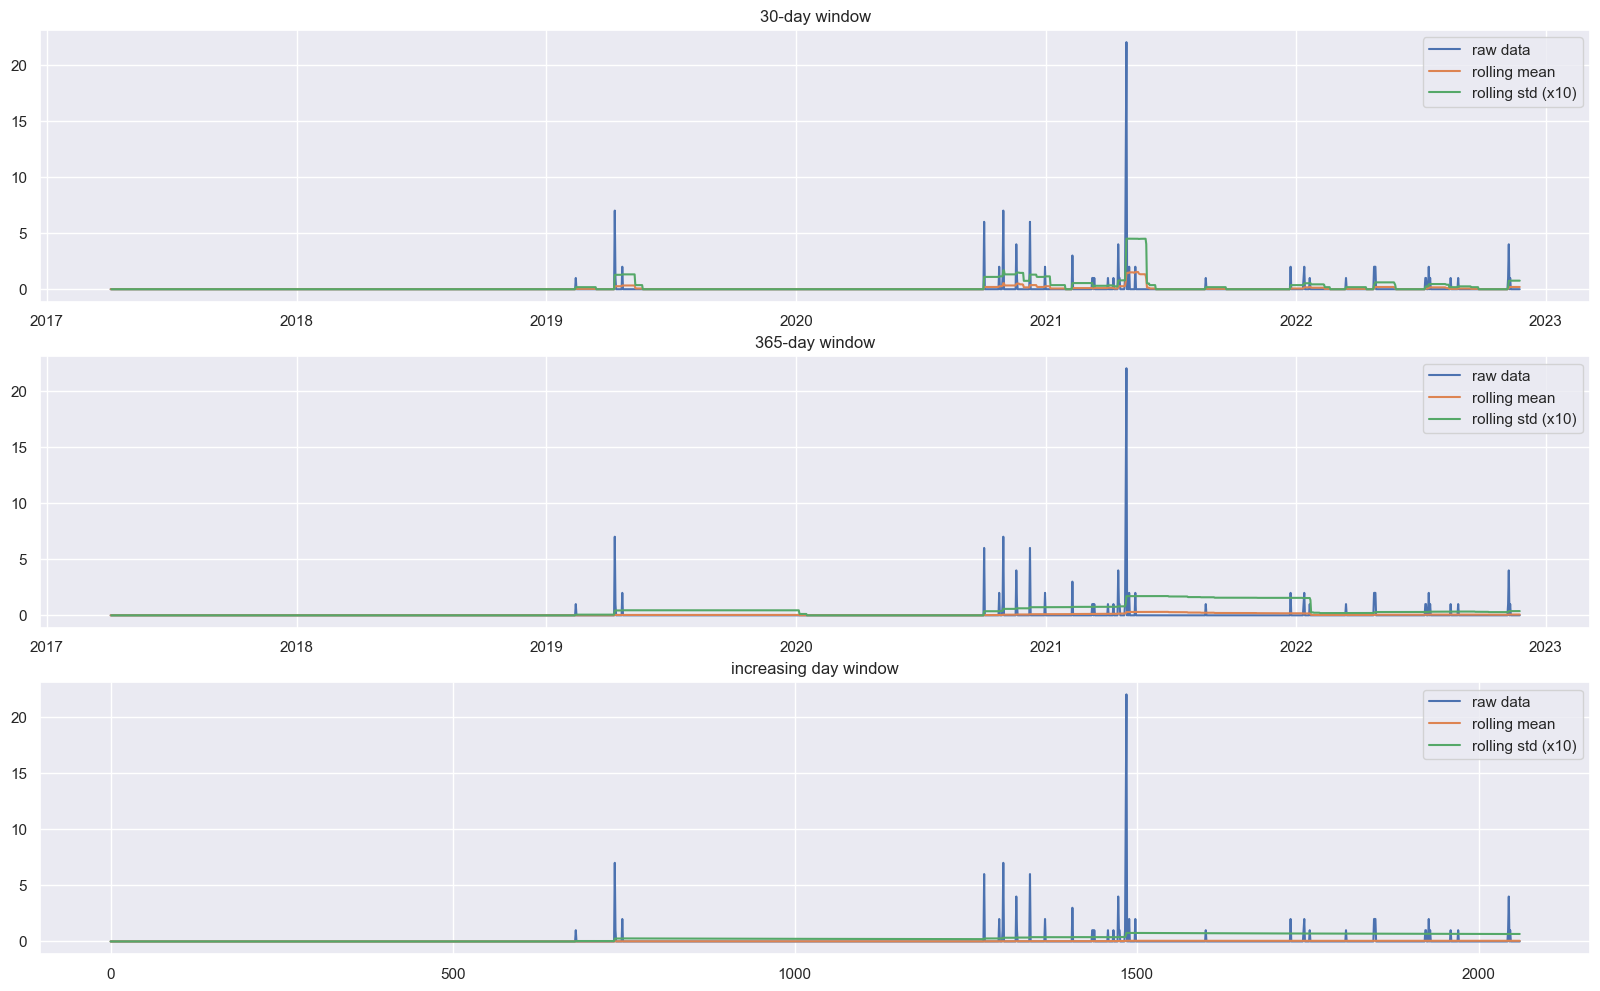

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- day_new_stream --------------------------------------------------------------------


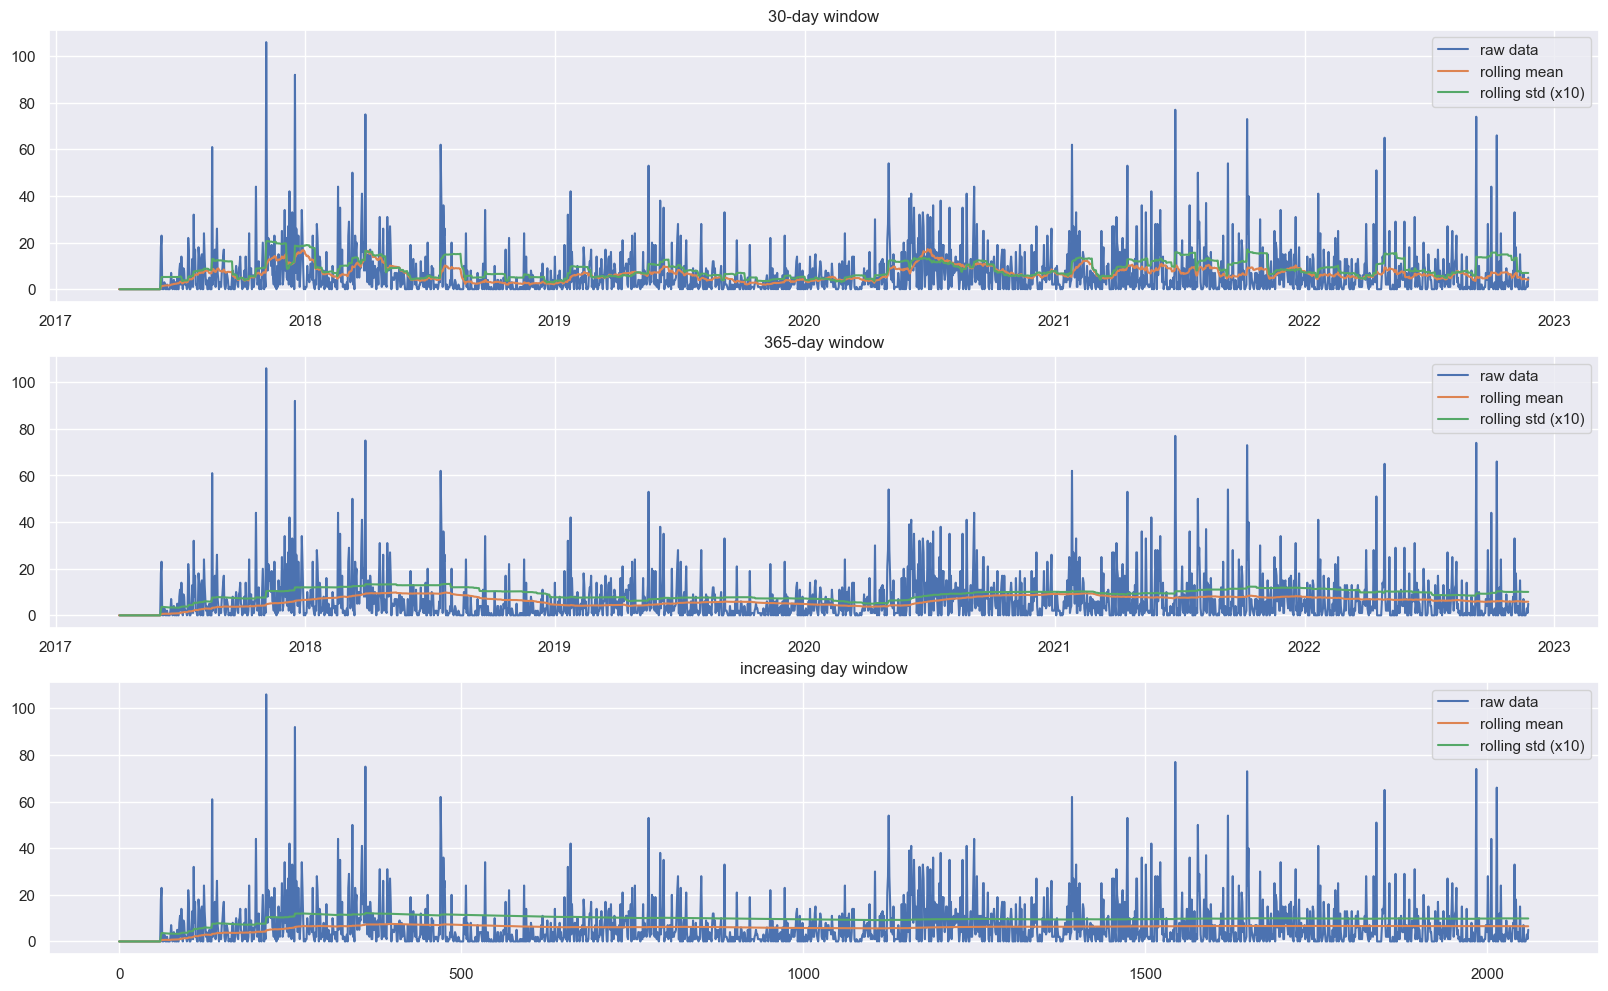

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- day_new_song --------------------------------------------------------------------


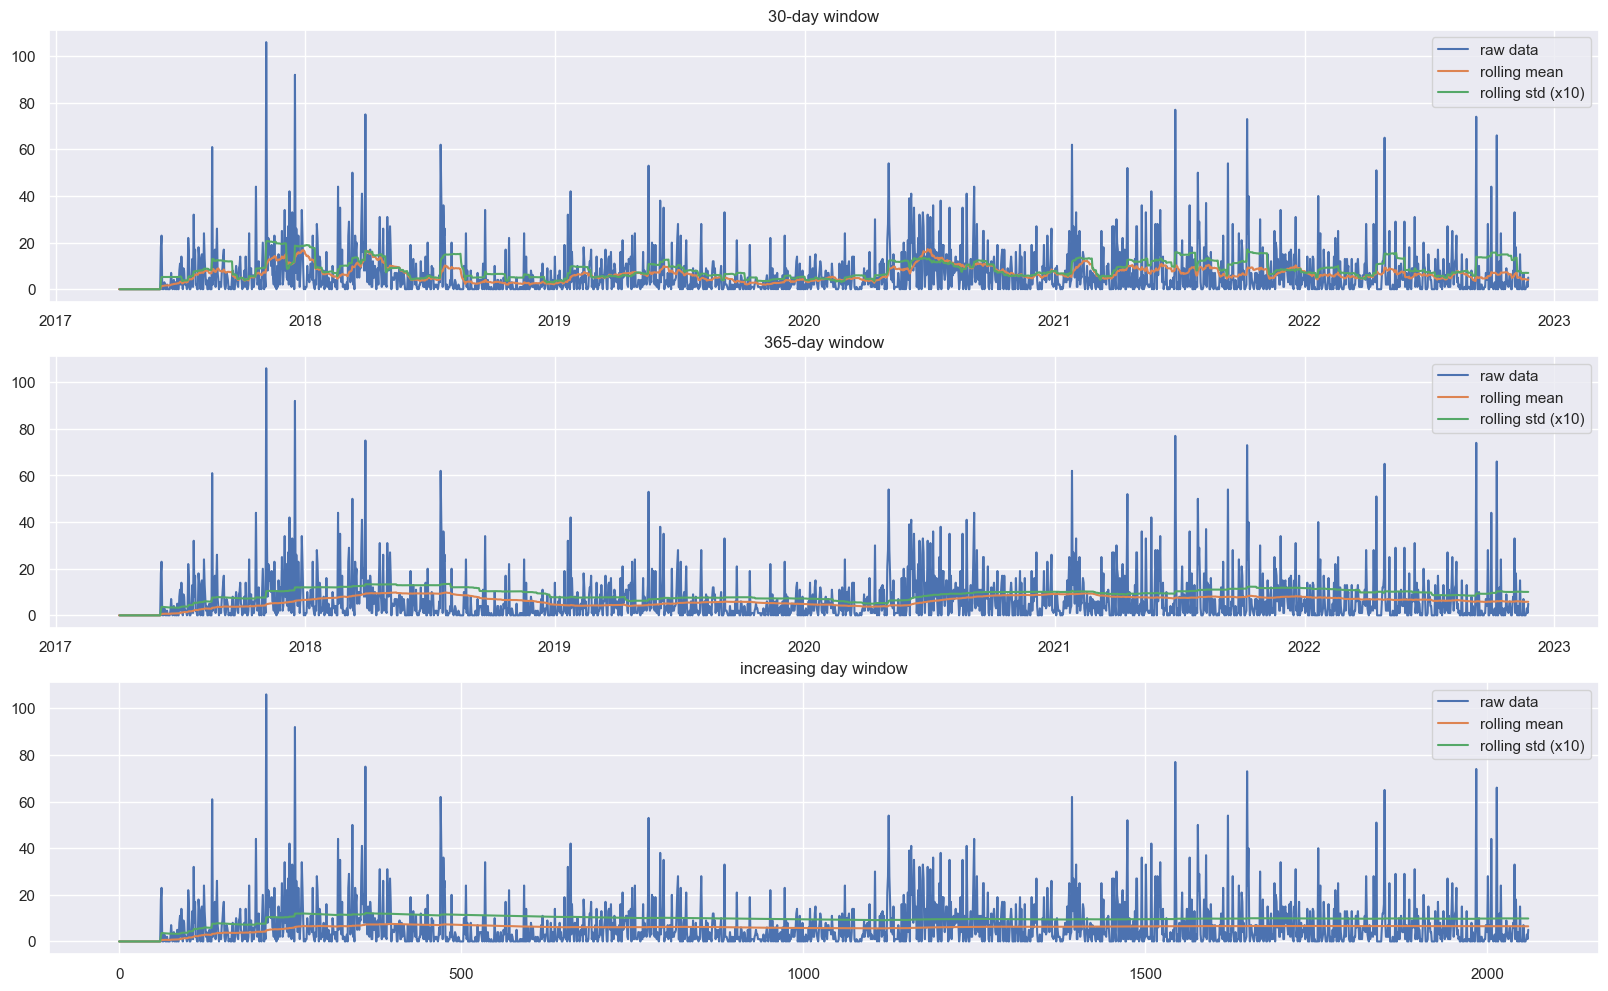

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- day_new_podcast --------------------------------------------------------------------


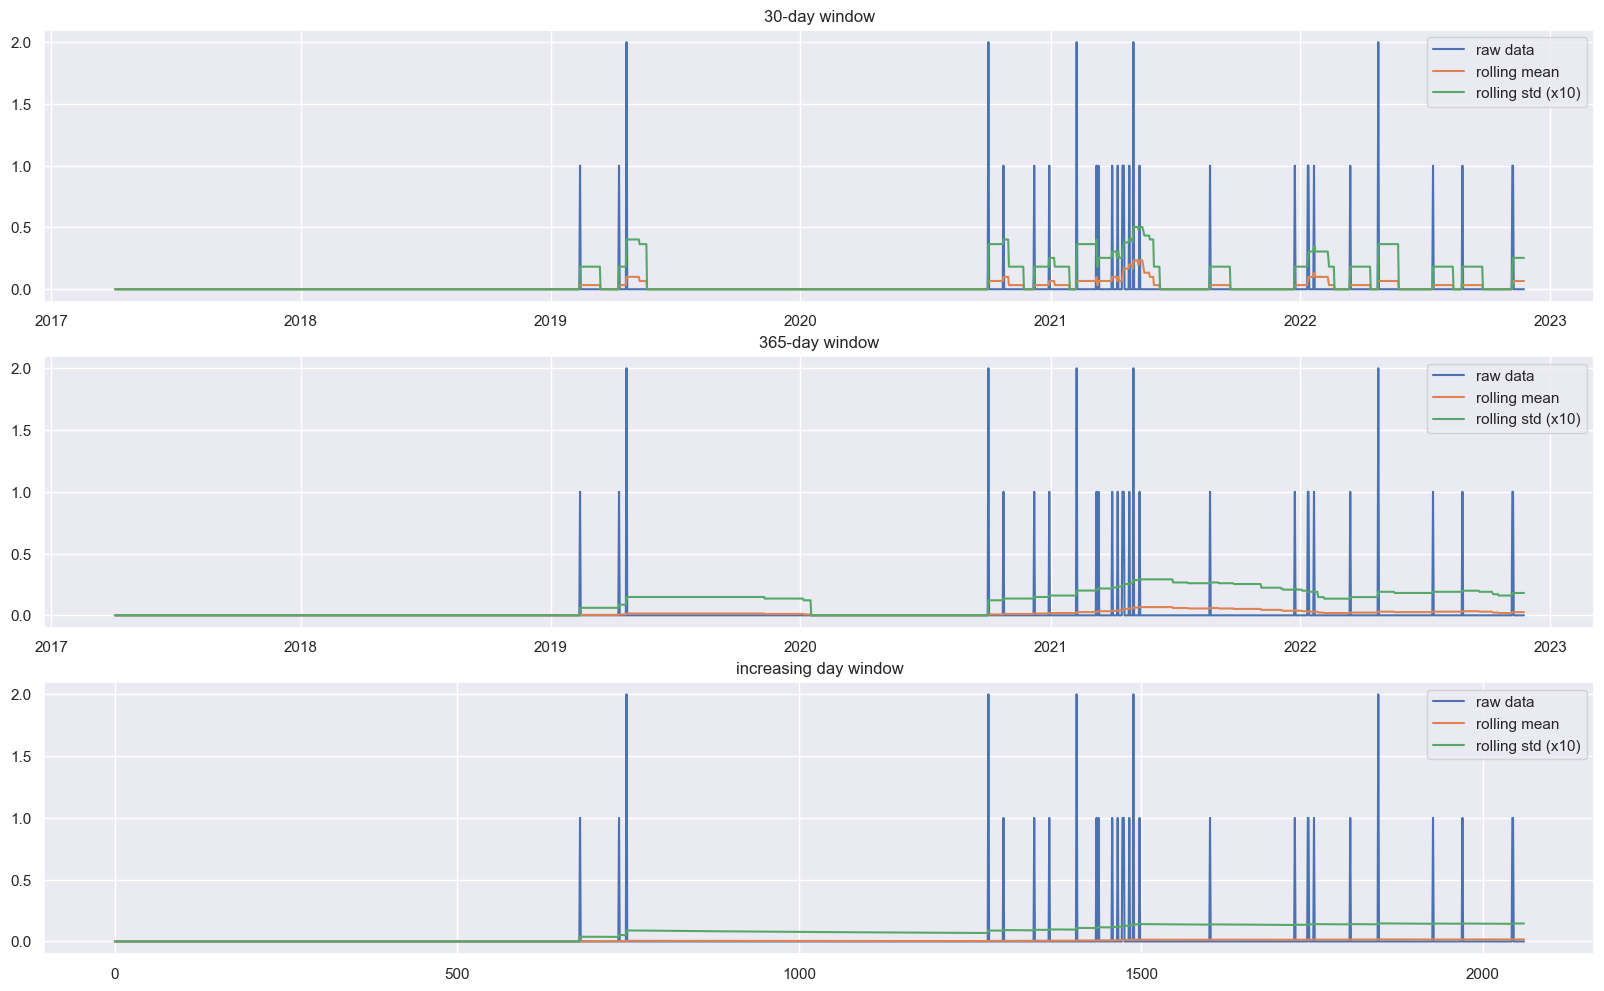

------------------------------------------------------------------------------------------------------------------------


In [143]:
for i in TARGETS:
    print('-------------------------------------------- ' + str(i) + ' --------------------------------------------------------------------')    
    analyze_stationarity(df[i], 'raw data', i)
    print('------------------------------------------------------------------------------------------------------------------------')

### <span style="background:lightgreen"> Time Serie Decomposition - ACF & PACF <span>

<span style="background:violet"> Decode - Functions <span>

In [144]:
from typing import List, Tuple

def deco(df, share_type='day_n_streams', samples=2033, period=30, plot_components=['observed', 'trend', 'seasonal', 'residual']):
    """
    Decompose a time series into its components and plot the selected components.
    
    Args:
        df (pandas.DataFrame): Input data frame containing the time series.
        share_type (str): Column in the input data frame containing the time series to decompose.
        samples (int): Number of samples to use for the decomposition. If 'all', use all samples.
        period (int): Length of the seasonal component of the time series.
        plot_components (List[str]): List of components to plot. Possible values are 'observed', 'trend', 'seasonal', 'residual'.
    
    Returns:
        tuple: A tuple containing the decomposed components of the time series.
    """
    if samples == 'all':
        #decomposing all time series timestamps
        res = seasonal_decompose(df[share_type].values, period=period)
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[share_type].values[-samples:], period=period)
    
    components = {
        'observed': res.observed,
        'trend': res.trend,
        'seasonal': res.seasonal,
        'residual': res.resid
    }
    
    # Plot the selected components
    fig, axs = plt.subplots(len(plot_components), figsize=(20,8))
    for i, component in enumerate(plot_components):
        axs[i].set_ylabel(component.upper(), fontsize=12)
        axs[i].plot(components[component])
        axs[i].grid()
    
    plt.show()
    
    return (res.observed, res.trend, res.seasonal, res.resid)

#### <span style="background:skyblue"> 200 Samples <span>

-------------------------------------------- day_n_streams -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


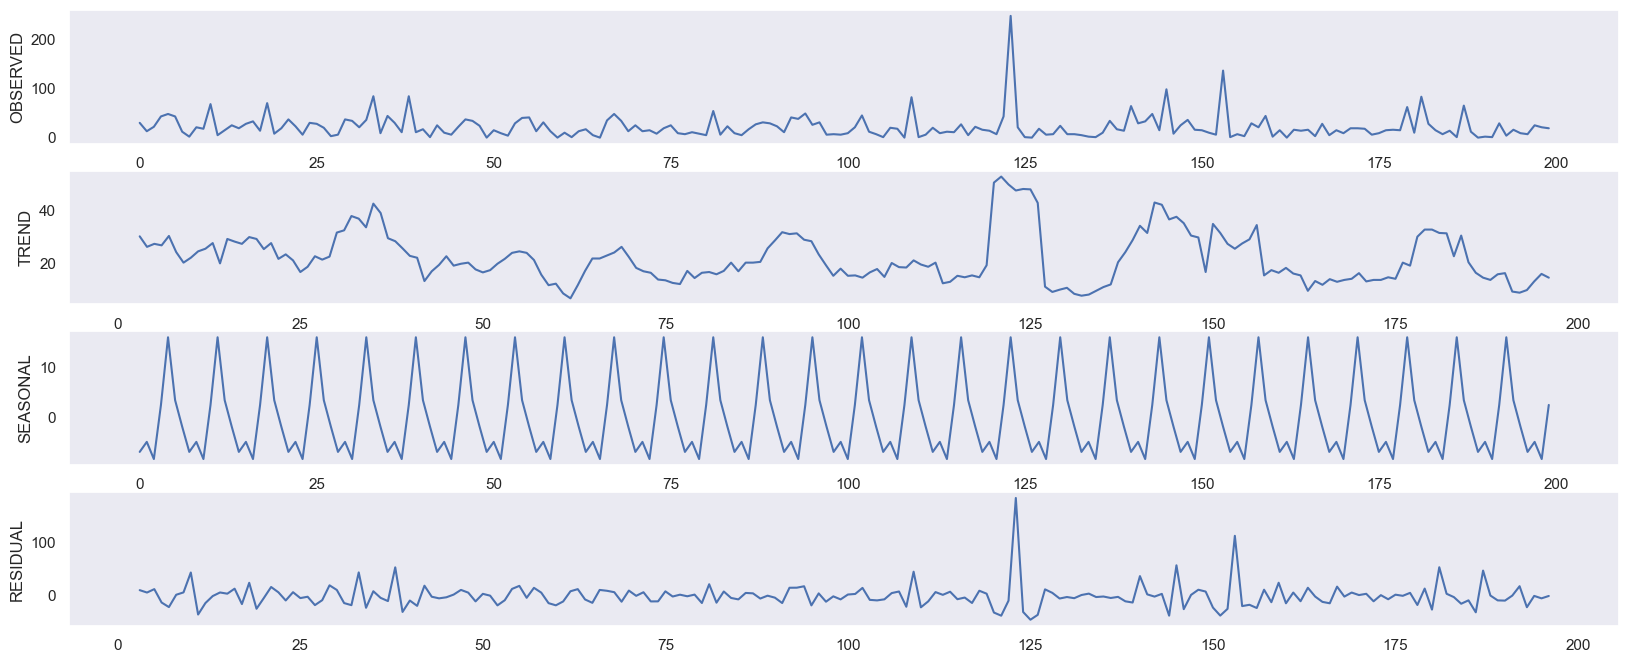

-------------------------------------------- day_n_songs -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


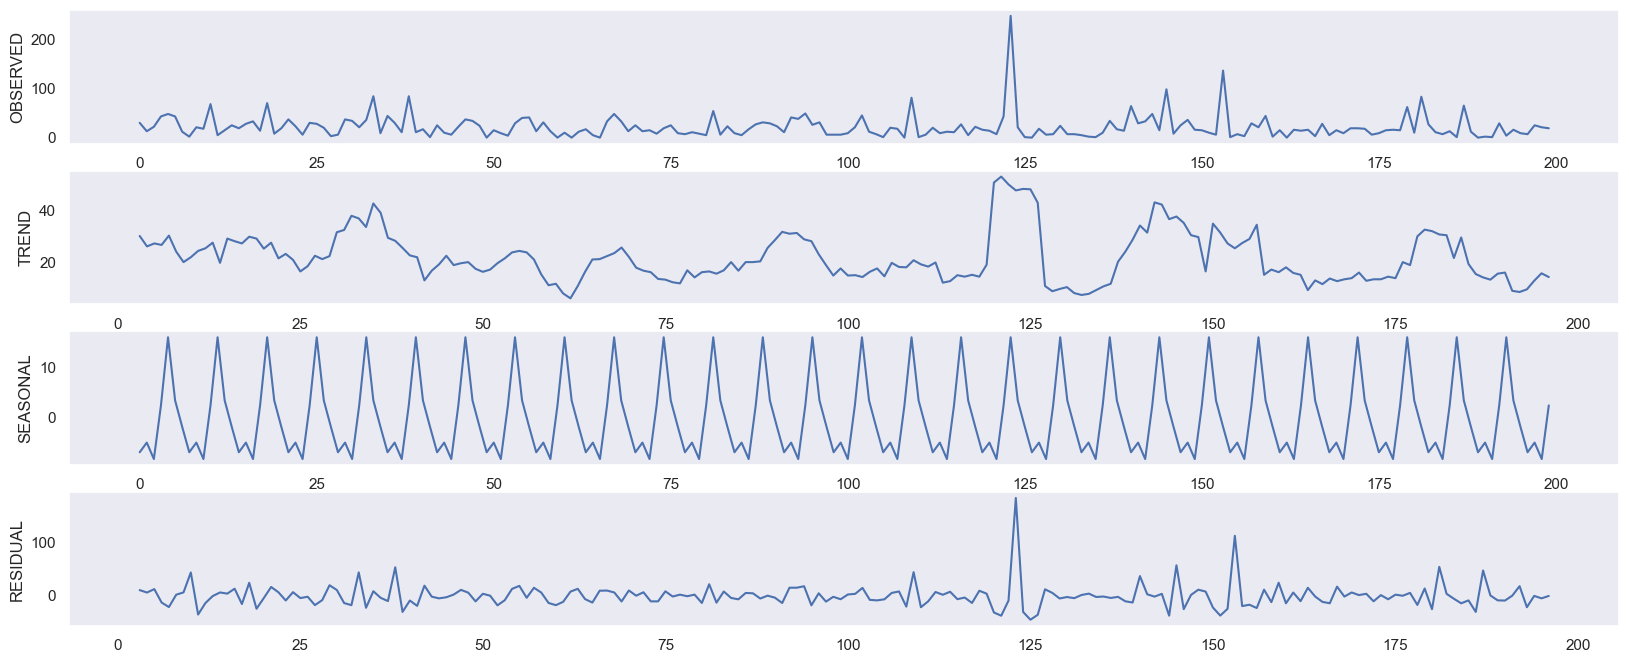

-------------------------------------------- day_n_podcast -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


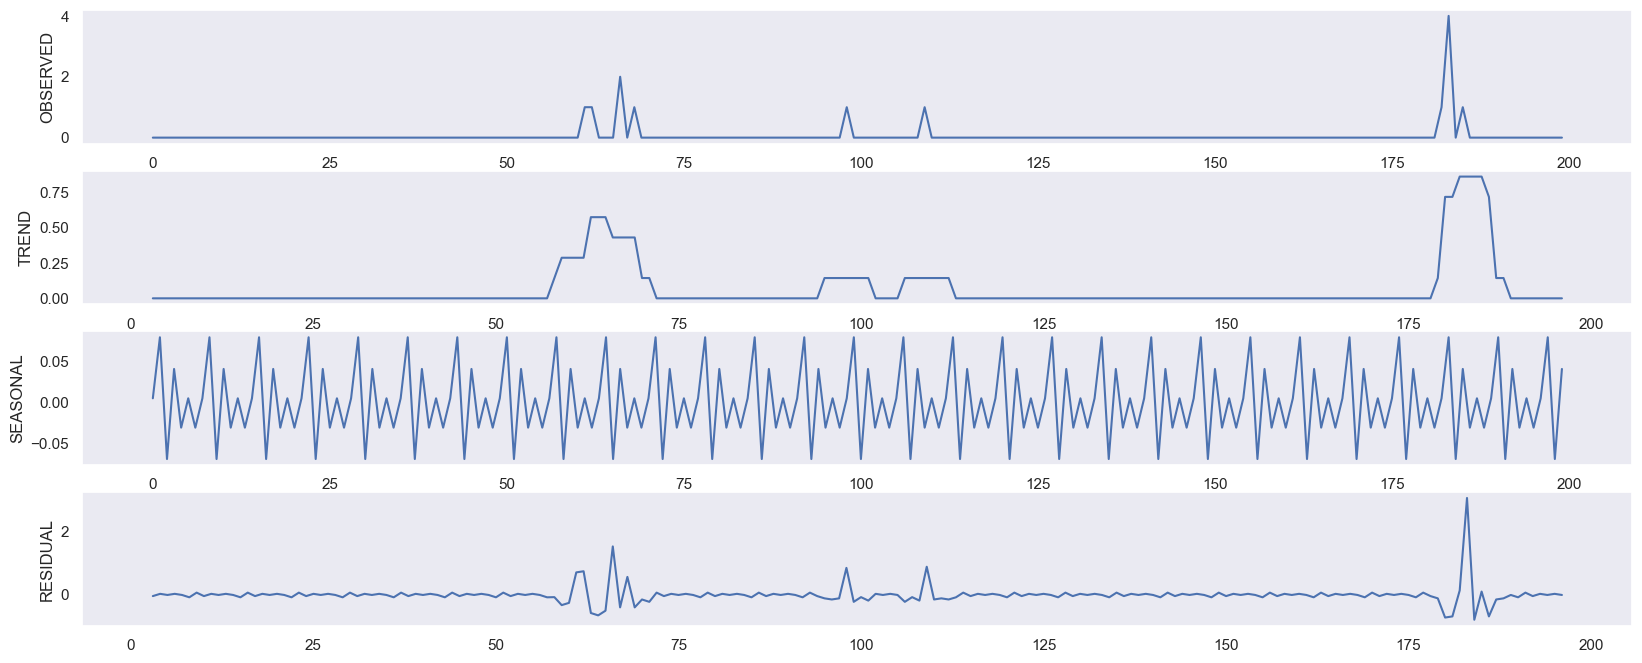

-------------------------------------------- day_new_stream -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


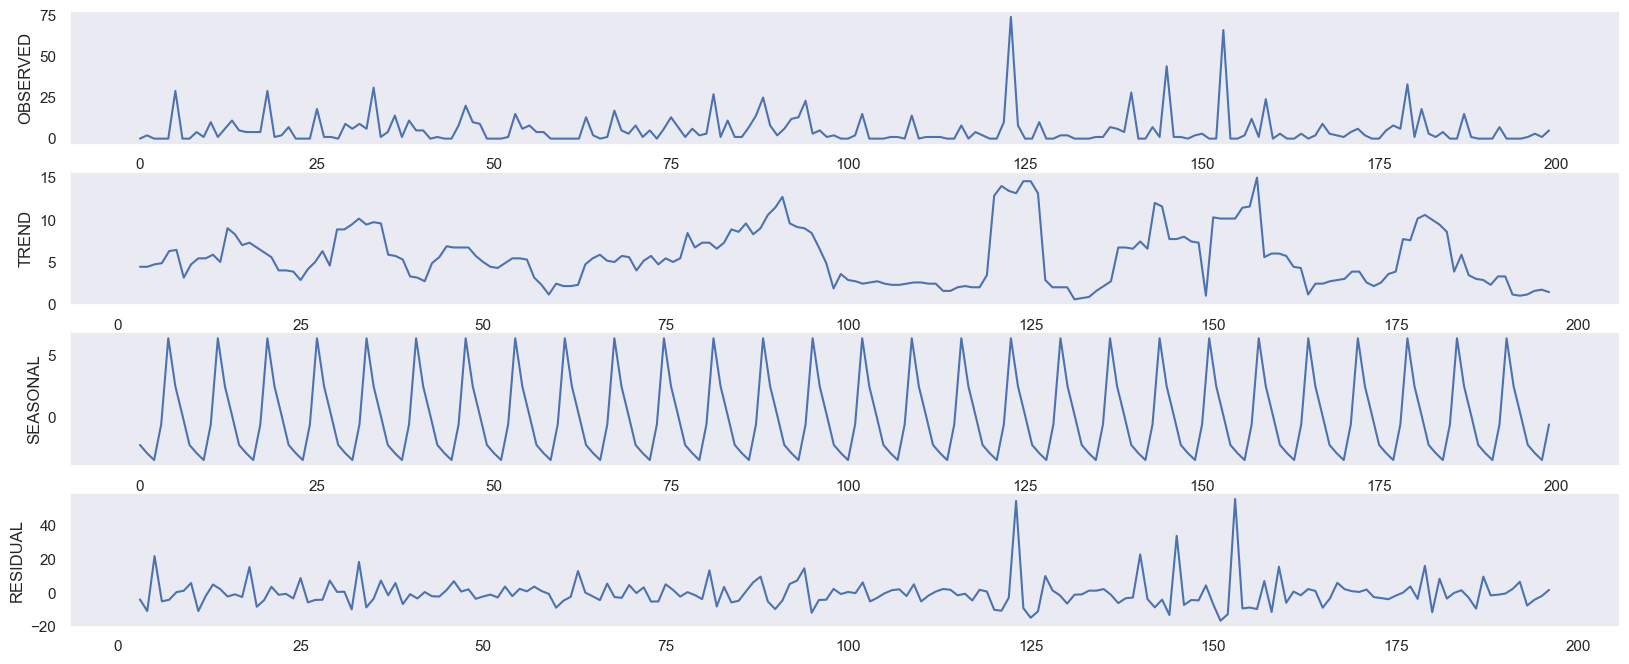

-------------------------------------------- day_new_song -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


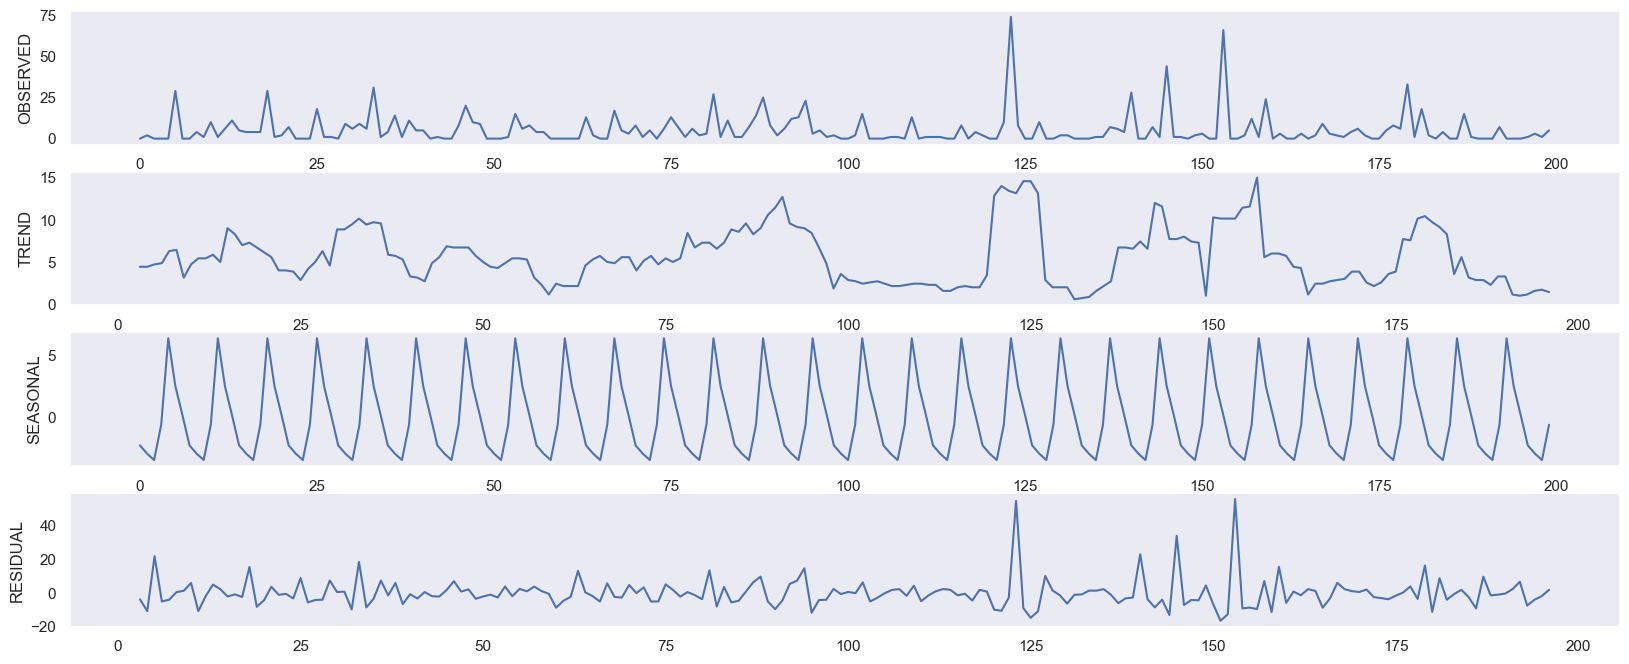

-------------------------------------------- day_new_podcast -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


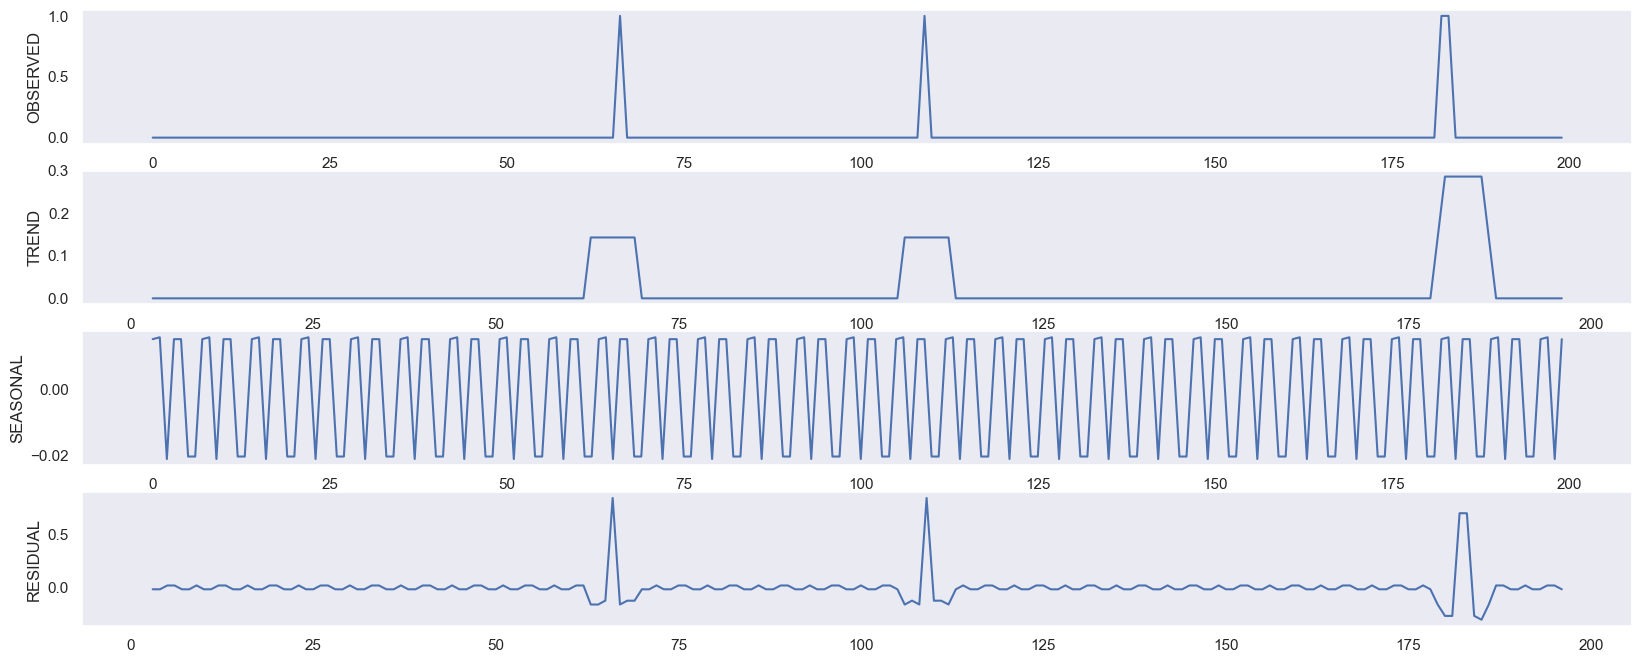

In [145]:
for i in TARGET:
    print('-------------------------------------------- ' + str(i) + ' -----------------------------------------------------------------')    
    print(' - - - - - - - - - - - - - - - - - - - - - - ' + 'period ' + str(30) + ' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
    deco(df, share_type = i, samples=200, period=7)

#### <span style="background:skyblue"> All Data  <span>

-------------------------------------------- day_n_streams -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


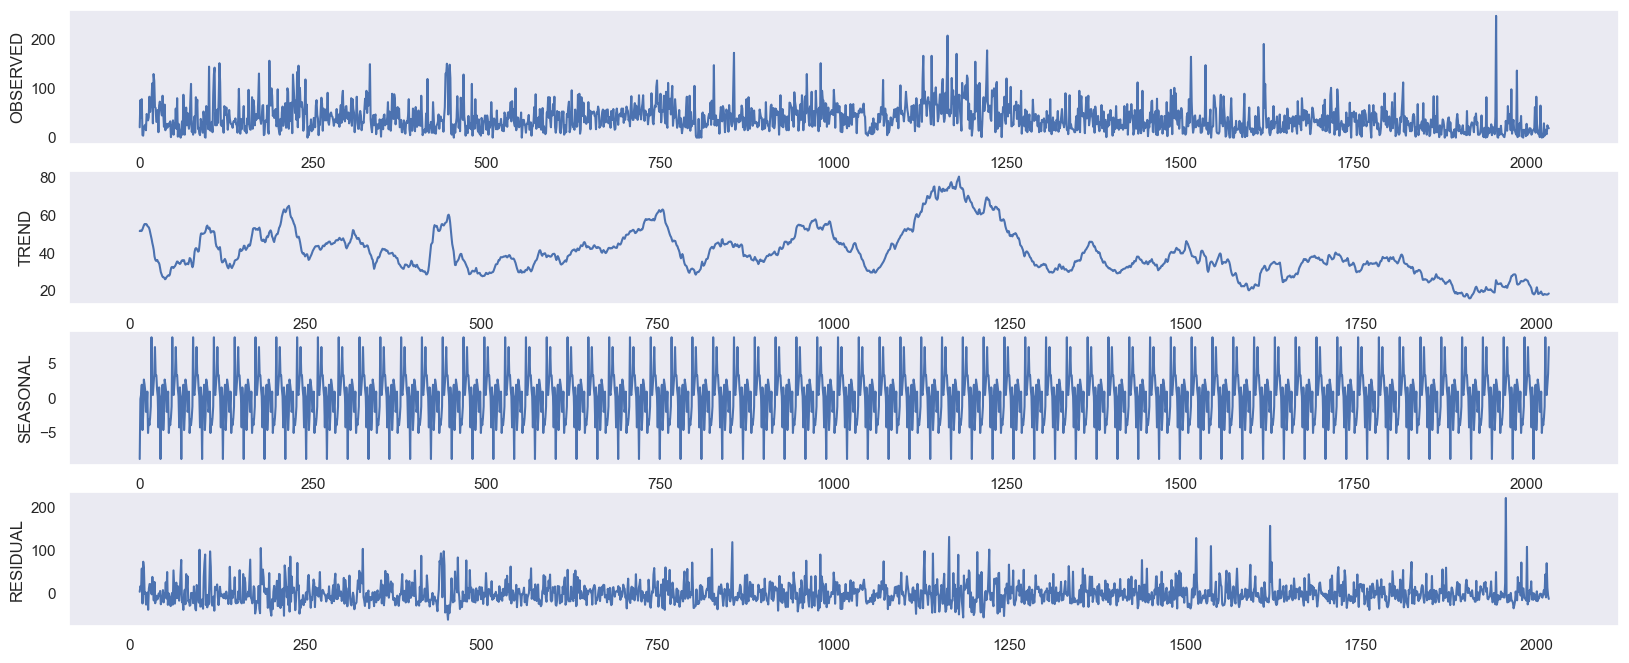

-------------------------------------------- day_n_songs -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


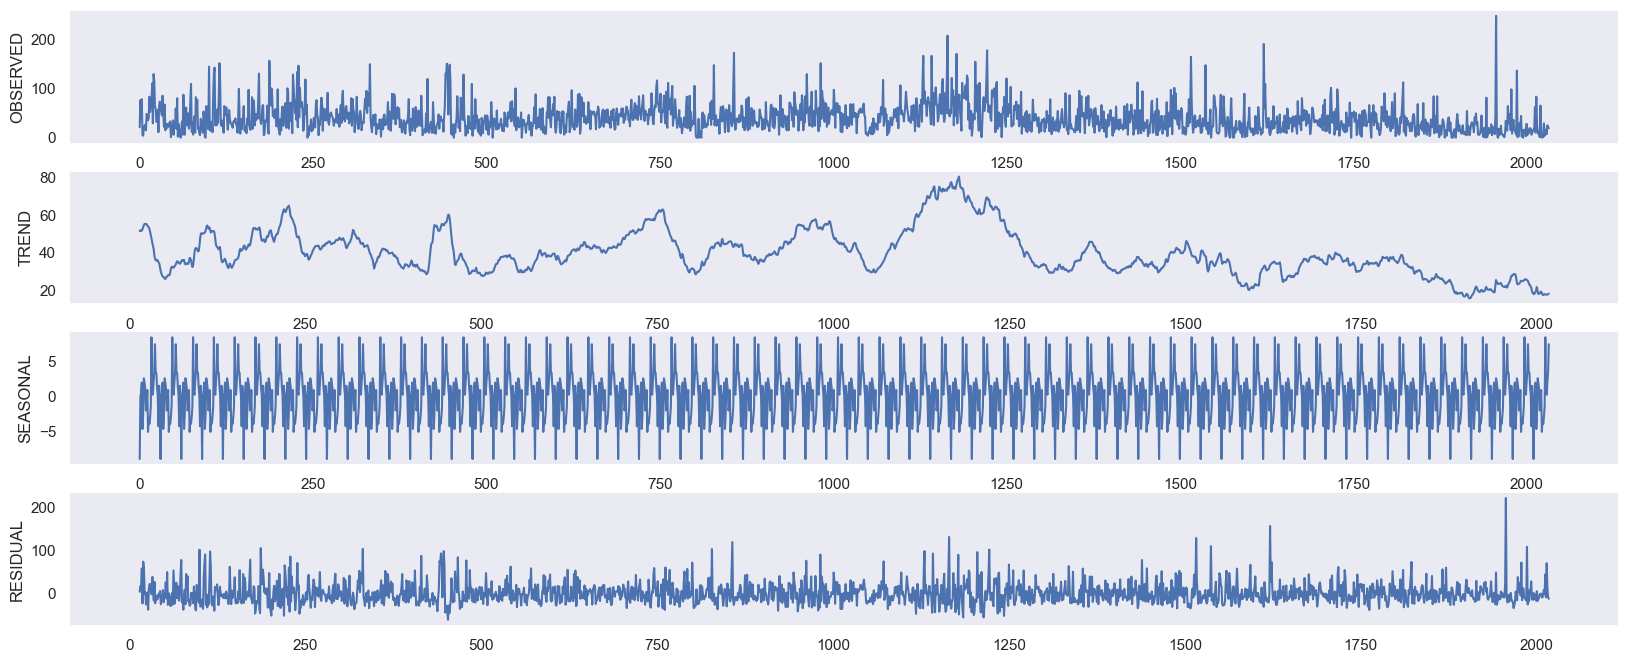

-------------------------------------------- day_n_podcast -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


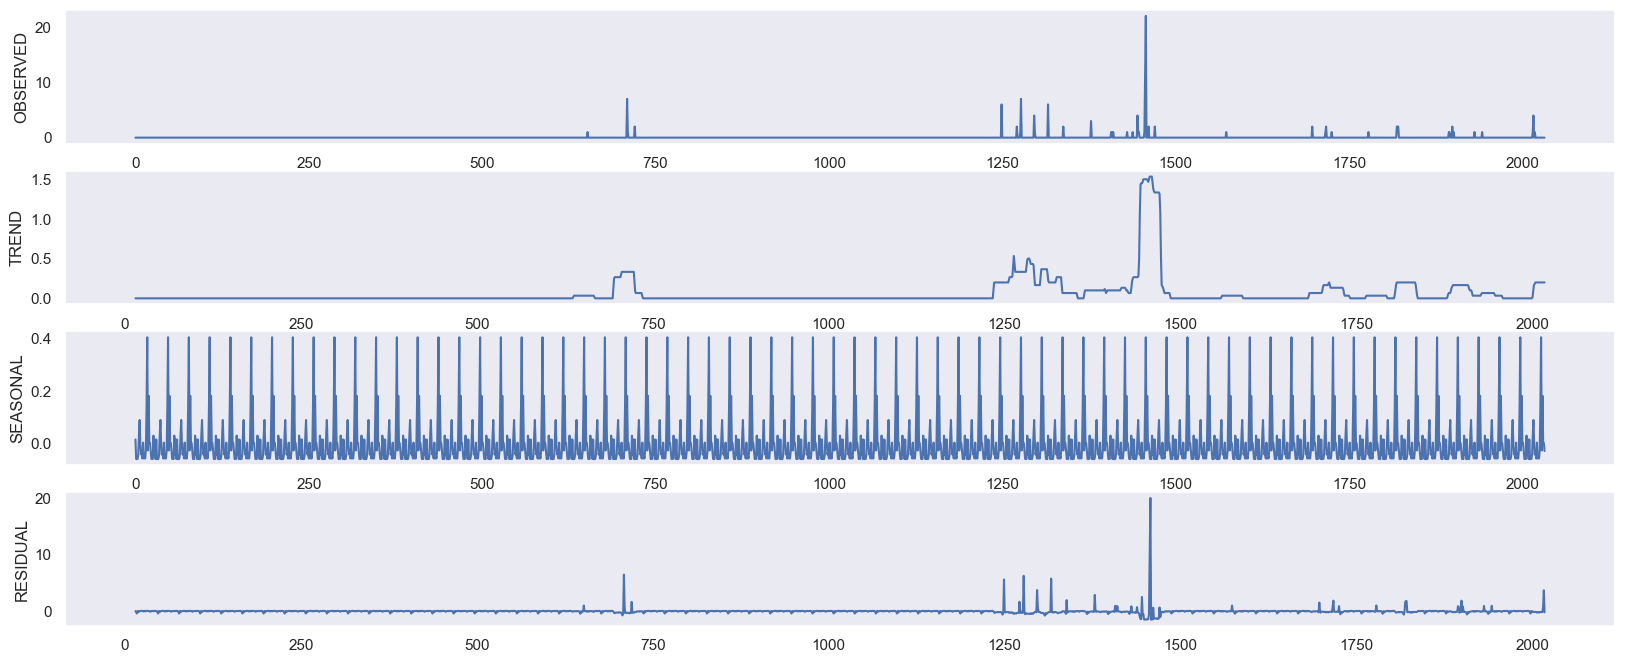

-------------------------------------------- day_new_stream -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


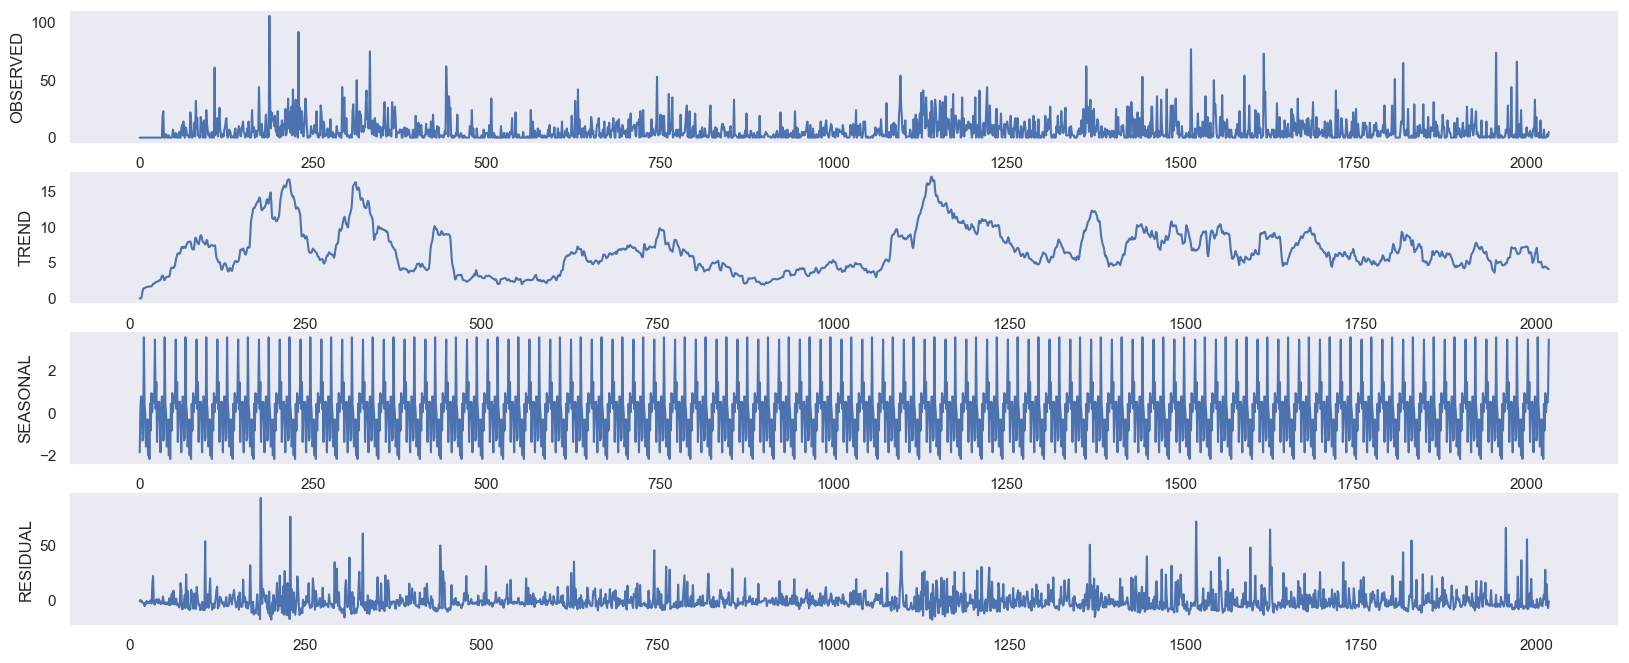

-------------------------------------------- day_new_song -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


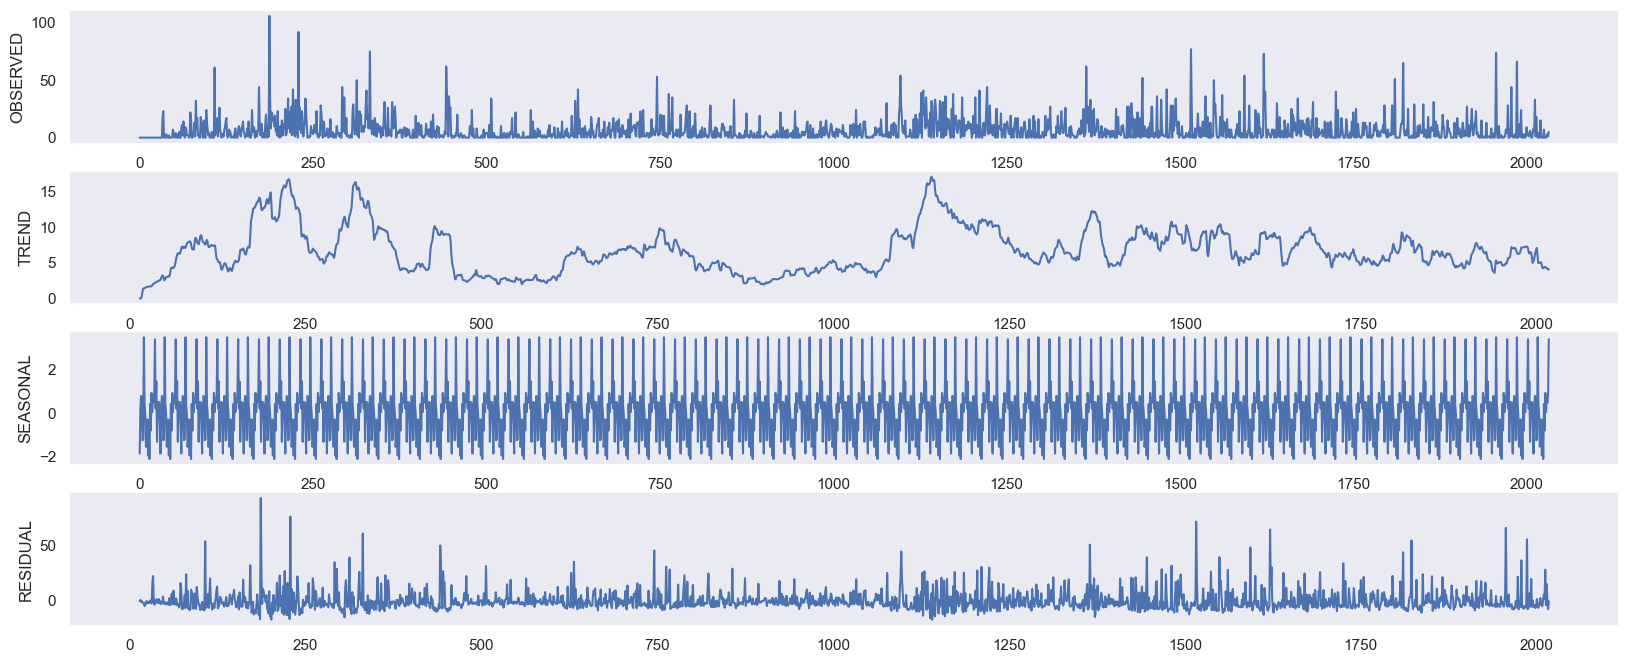

-------------------------------------------- day_new_podcast -----------------------------------------------------------------
 - - - - - - - - - - - - - - - - - - - - - - period 30 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


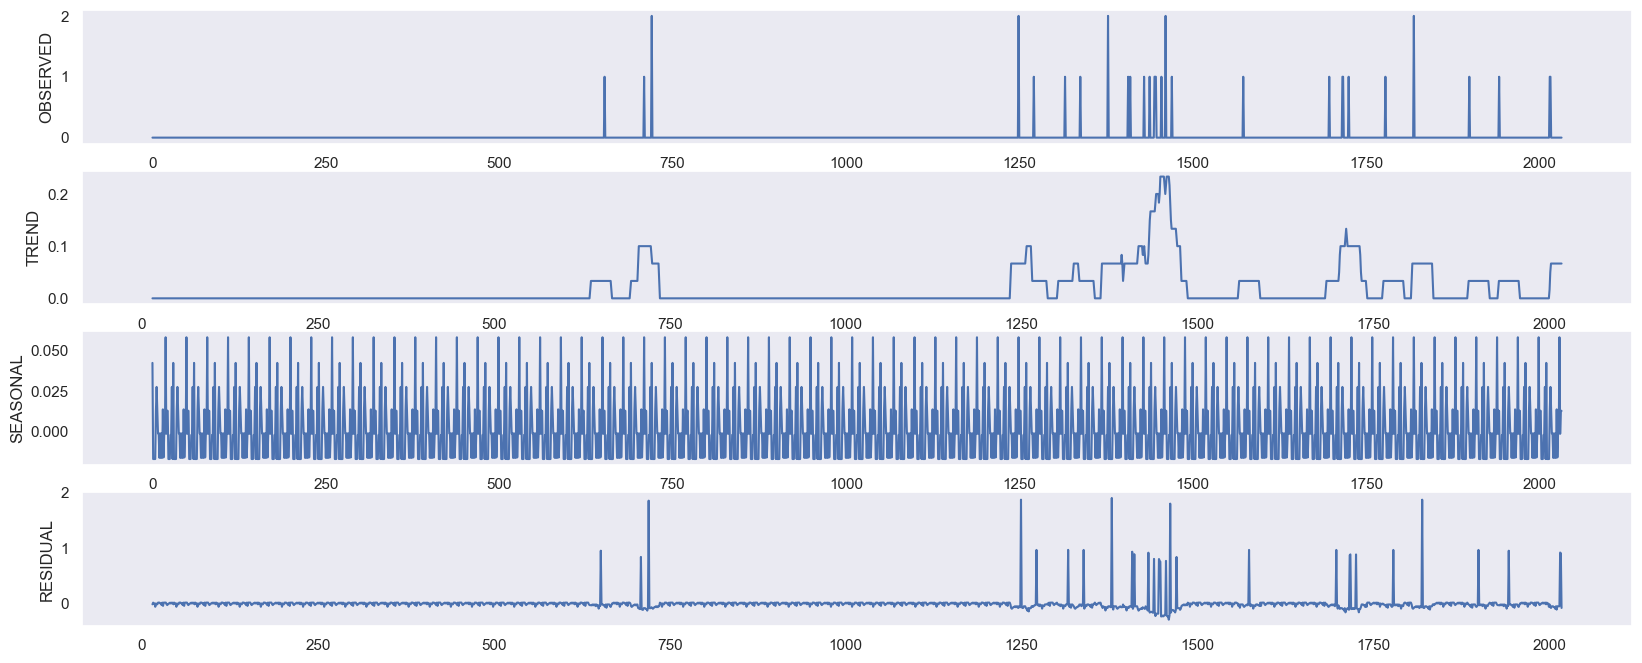

In [146]:
for i in TARGET:
    print('-------------------------------------------- ' + str(i) + ' -----------------------------------------------------------------')    
    print(' - - - - - - - - - - - - - - - - - - - - - - ' + 'period ' + str(30) + ' - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
    deco(df, share_type = i, samples=2033, period=30)

### <span style="background:lightgreen"> Autoregresiveness - ACF & PACF <span>

<span style="background:violet"> ACF -PCF - Functions <span>

In [147]:
# Plot Correlation
def plot_corrs(data = 'day_n_streams', l1 = 30, l2 = 14):
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    plot_acf(df[data].values, lags=l1, ax=ax[0], title='Autocorr '+ data + ' ' + str(l1))
    plot_pacf(df[data].values, lags=l1, ax=ax[1], title='Partialcorr '+ data + ' ' + str(l1))
    #plot_acf(df[data].values, lags=l2, ax=ax[1][0], title='Autocorr '+ data + ' ' + str(l2))
    #plot_pacf(df[data].values, lags=l2, ax=ax[1][1], title='Partialcorr '+ data + ' ' + str(l2))

    plt.show()

In [148]:
def plot_dailies(data = 'day_n_streams'):
    fig, ax = plt.subplots(7,2,figsize=(20,20))

    plot_acf(df.loc[df['week_day'] == 0, data].values, ax=ax[0][0], title='Autocorrelation - Day 0 - ' + str(data))
    plot_pacf(df.loc[df['week_day'] == 0, data].values, ax=ax[0][1], title='Partial Autocorrelation - Day 0 - ' + str(data))

    plot_acf(df.loc[df['week_day'] == 1, data].values, ax=ax[1][0], title='Autocorrelation - Day 1 - ' + str(data))
    plot_pacf(df.loc[df['week_day'] == 1, data].values, ax=ax[1][1], title='Partial Autocorrelation - Day 1 - ' + str(data))

    plot_acf(df.loc[df['week_day'] == 2, data].values, ax=ax[2][0], title='Autocorrelation - Day 2 - ' + str(data))
    plot_pacf(df.loc[df['week_day'] == 2, data].values, ax=ax[2][1], title='Partial Autocorrelation - Day 2 - ' + str(data))

    plot_acf(df.loc[df['week_day'] == 3, data].values, ax=ax[3][0], title='Autocorrelation - Day 3 - ' + str(data))
    plot_pacf(df.loc[df['week_day'] == 3, data].values, ax=ax[3][1], title='Partial Autocorrelation - Day 3 - ' + str(data))

    plot_acf(df.loc[df['week_day'] == 4, data].values, ax=ax[4][0], title='Autocorrelation - Day 4 - ' + str(data))
    plot_pacf(df.loc[df['week_day'] == 4, data].values, ax=ax[4][1], title='Partial Autocorrelation - Day 4 - ' + str(data))

    plot_acf(df.loc[df['week_day'] == 5, data].values, ax=ax[5][0], title='Autocorrelation - Day 5 - ' + str(data))
    plot_pacf(df.loc[df['week_day'] == 5, data].values, ax=ax[5][1], title='Partial Autocorrelation - Day 5 - ' + str(data))

    plot_acf(df.loc[df['week_day'] == 6, data].values, ax=ax[6][0], title='Autocorrelation - Day 6 - ' + str(data))
    plot_pacf(df.loc[df['week_day'] == 6, data].values, ax=ax[6][1], title='Partial Autocorrelation - Day 6 - ' + str(data))
    plt.show()

#### <span style="background:skyblue"> ACF & PACF <span>

-------------------------------------------- day_n_streams --------------------------------------------------------------------


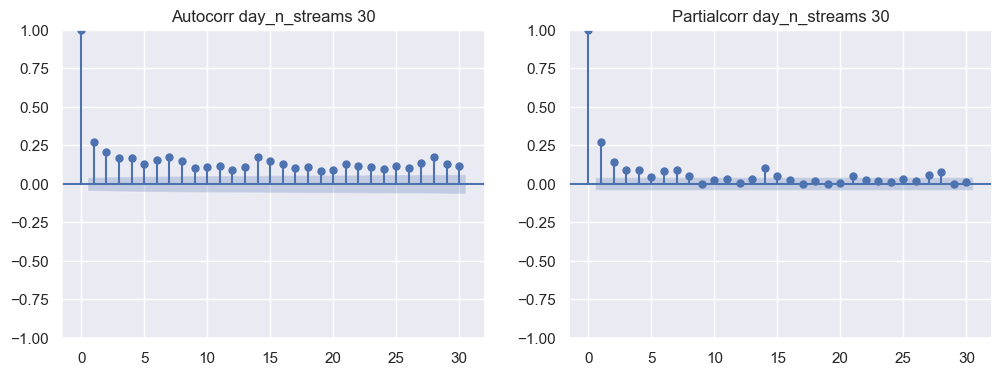

-------------------------------------------- day_n_songs --------------------------------------------------------------------


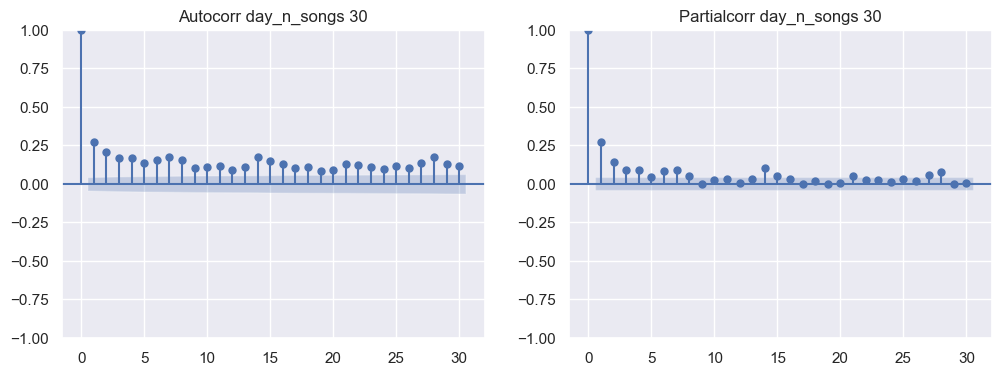

-------------------------------------------- day_n_podcast --------------------------------------------------------------------


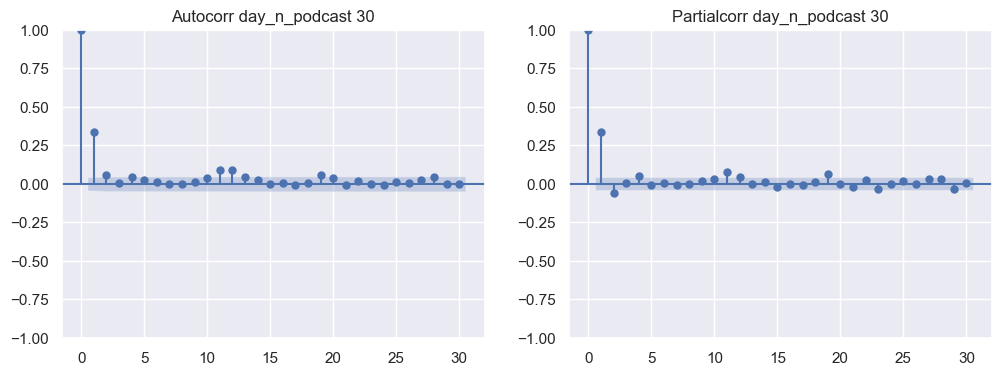

-------------------------------------------- day_new_stream --------------------------------------------------------------------


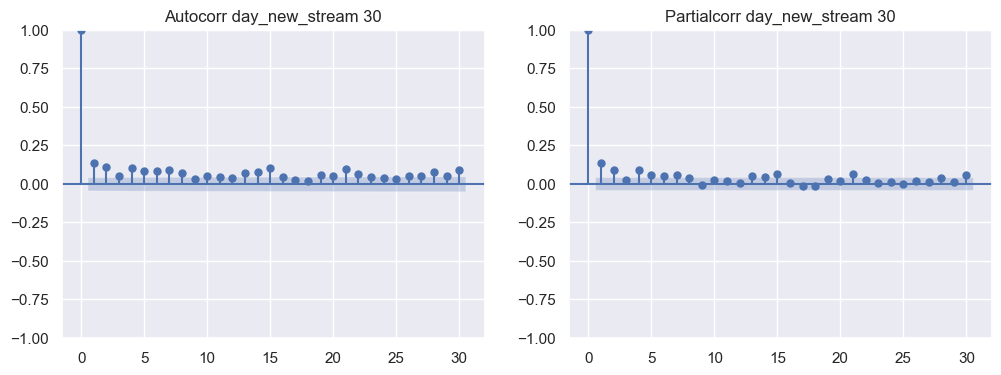

-------------------------------------------- day_new_song --------------------------------------------------------------------


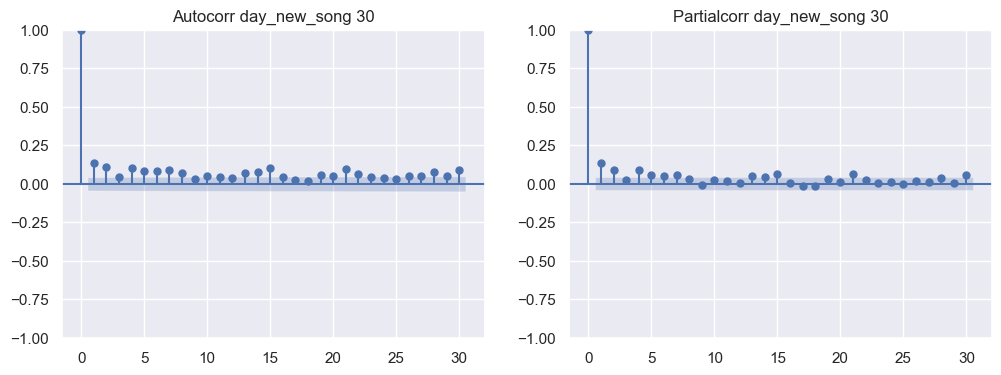

-------------------------------------------- day_new_podcast --------------------------------------------------------------------


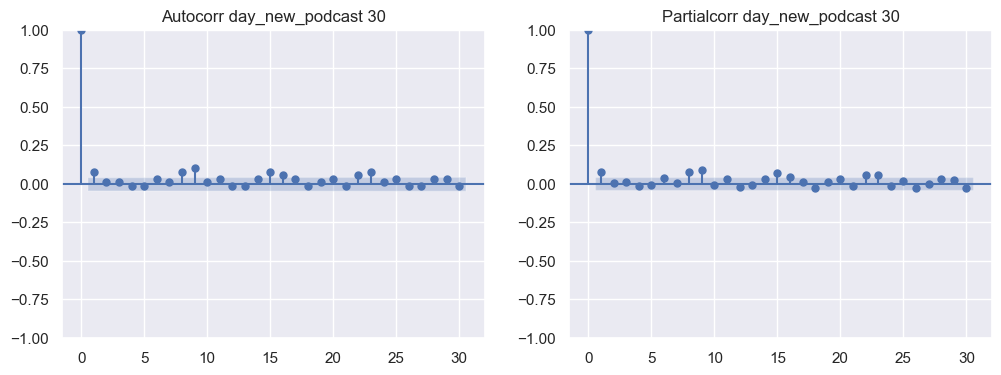

In [149]:
for i in TARGETS:
    print('-------------------------------------------- ' + str(i) + ' --------------------------------------------------------------------')    
    plot_corrs(i)

#### <span style='background :yellow' > Conclusiones Autocorrelacion Alta??? -- o AutocorrParcial Alta??? </span>

<span style='background :yellow' > Que signignifican estos valores altos y como se puede proceder </span>

<span style='background :yellow' > Como no hay ningun bucle subida bajada, intuímos que no son AUTOREGRESIVOS???? Habria que estudiarlo por horas, es decir un dia se explica por el anterior, como un servicio de alquiler de bicis electricas, que se usan mas a unas horas que a otras. Esto también depende fuertemente del usuario</span>

https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/

https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

#### <span style="background:skyblue"> ACF & PACF - By Week Day <span>

-------------------------------------------- day_n_streams --------------------------------------------------------------------


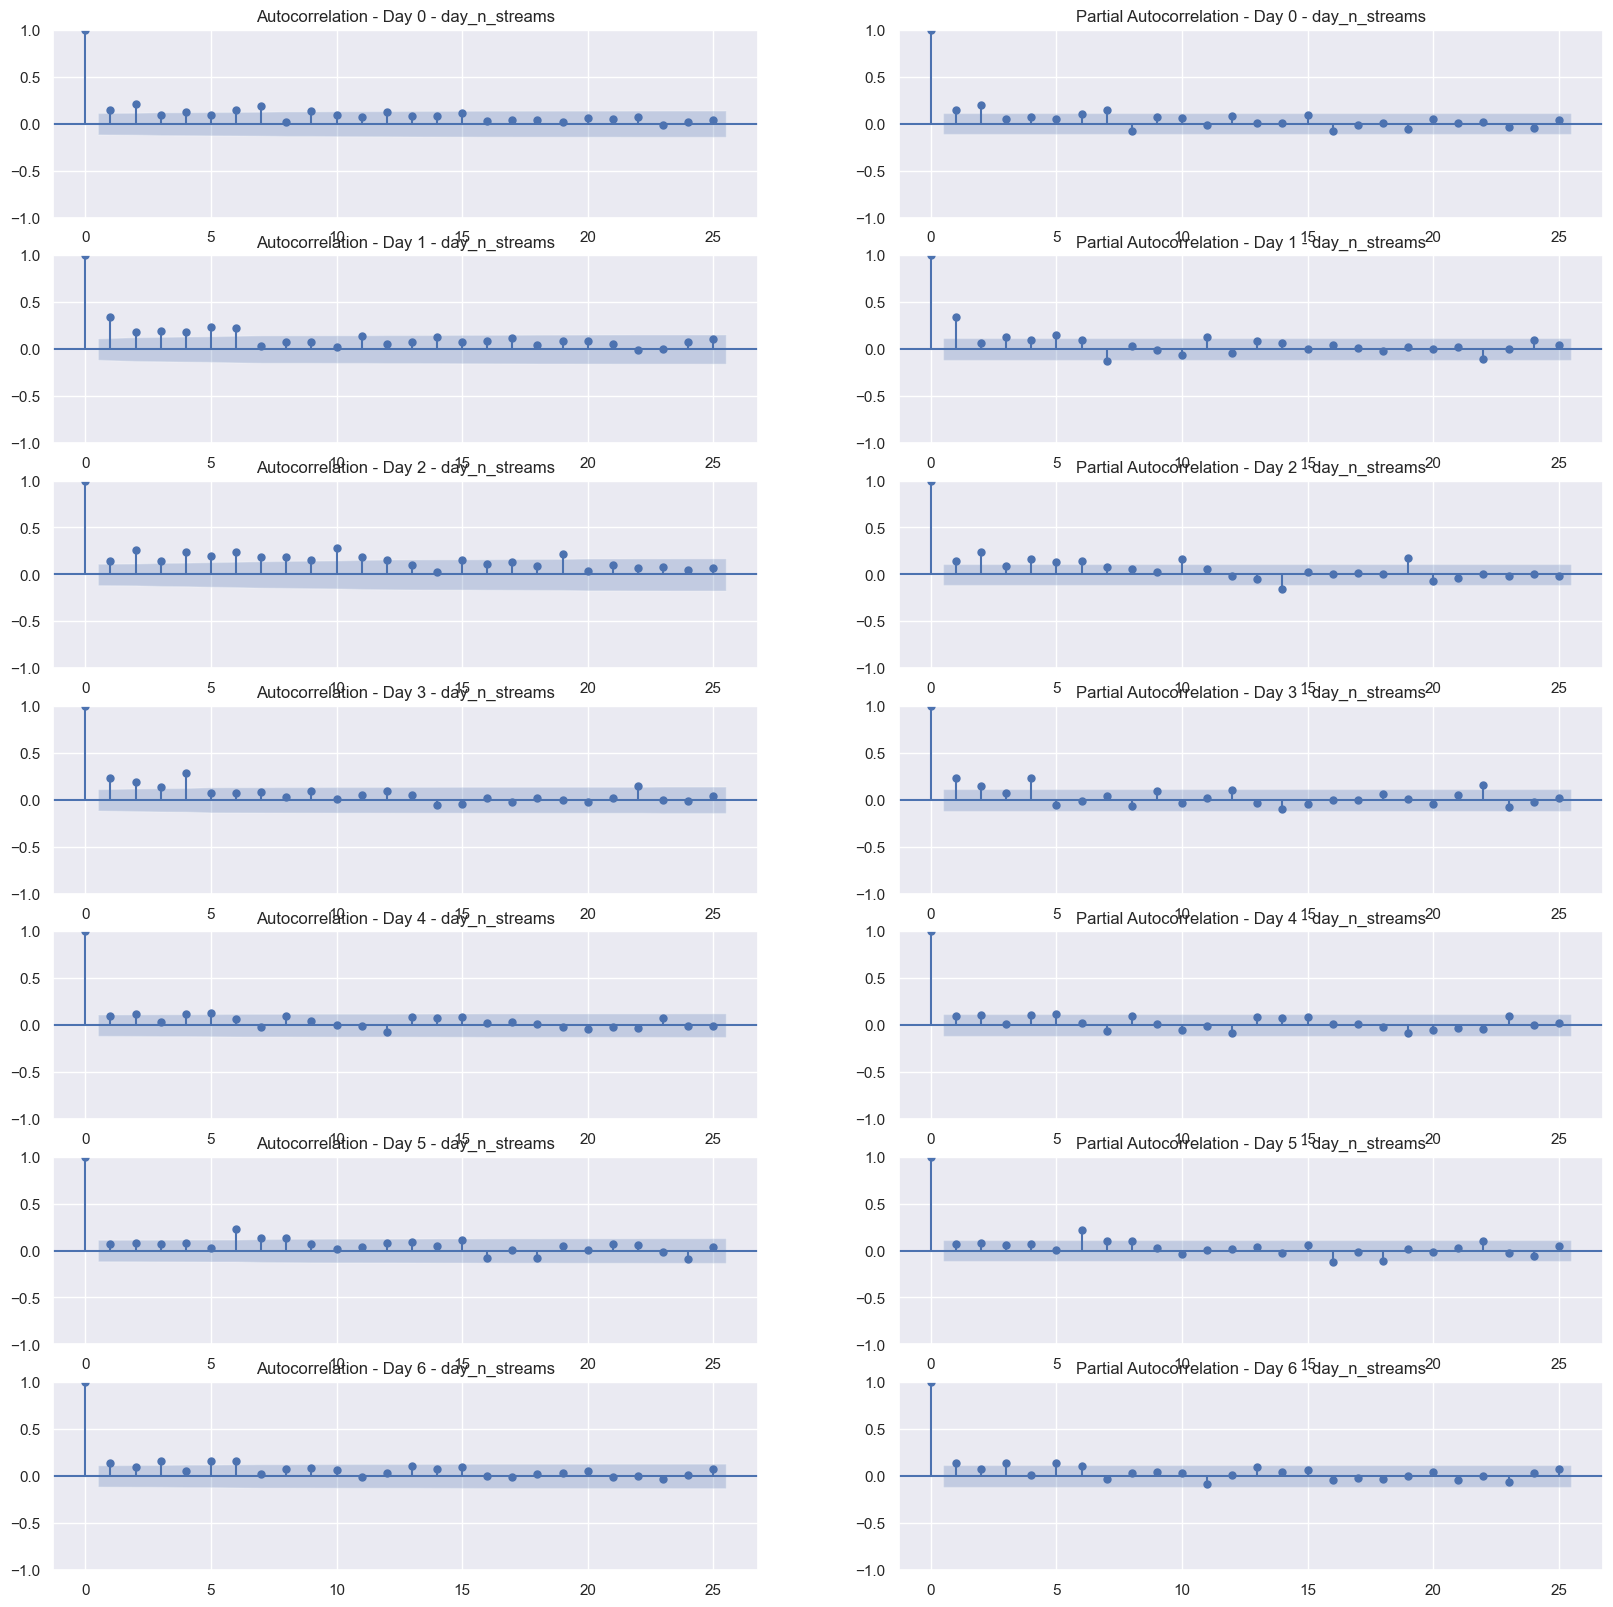

-------------------------------------------- day_n_songs --------------------------------------------------------------------


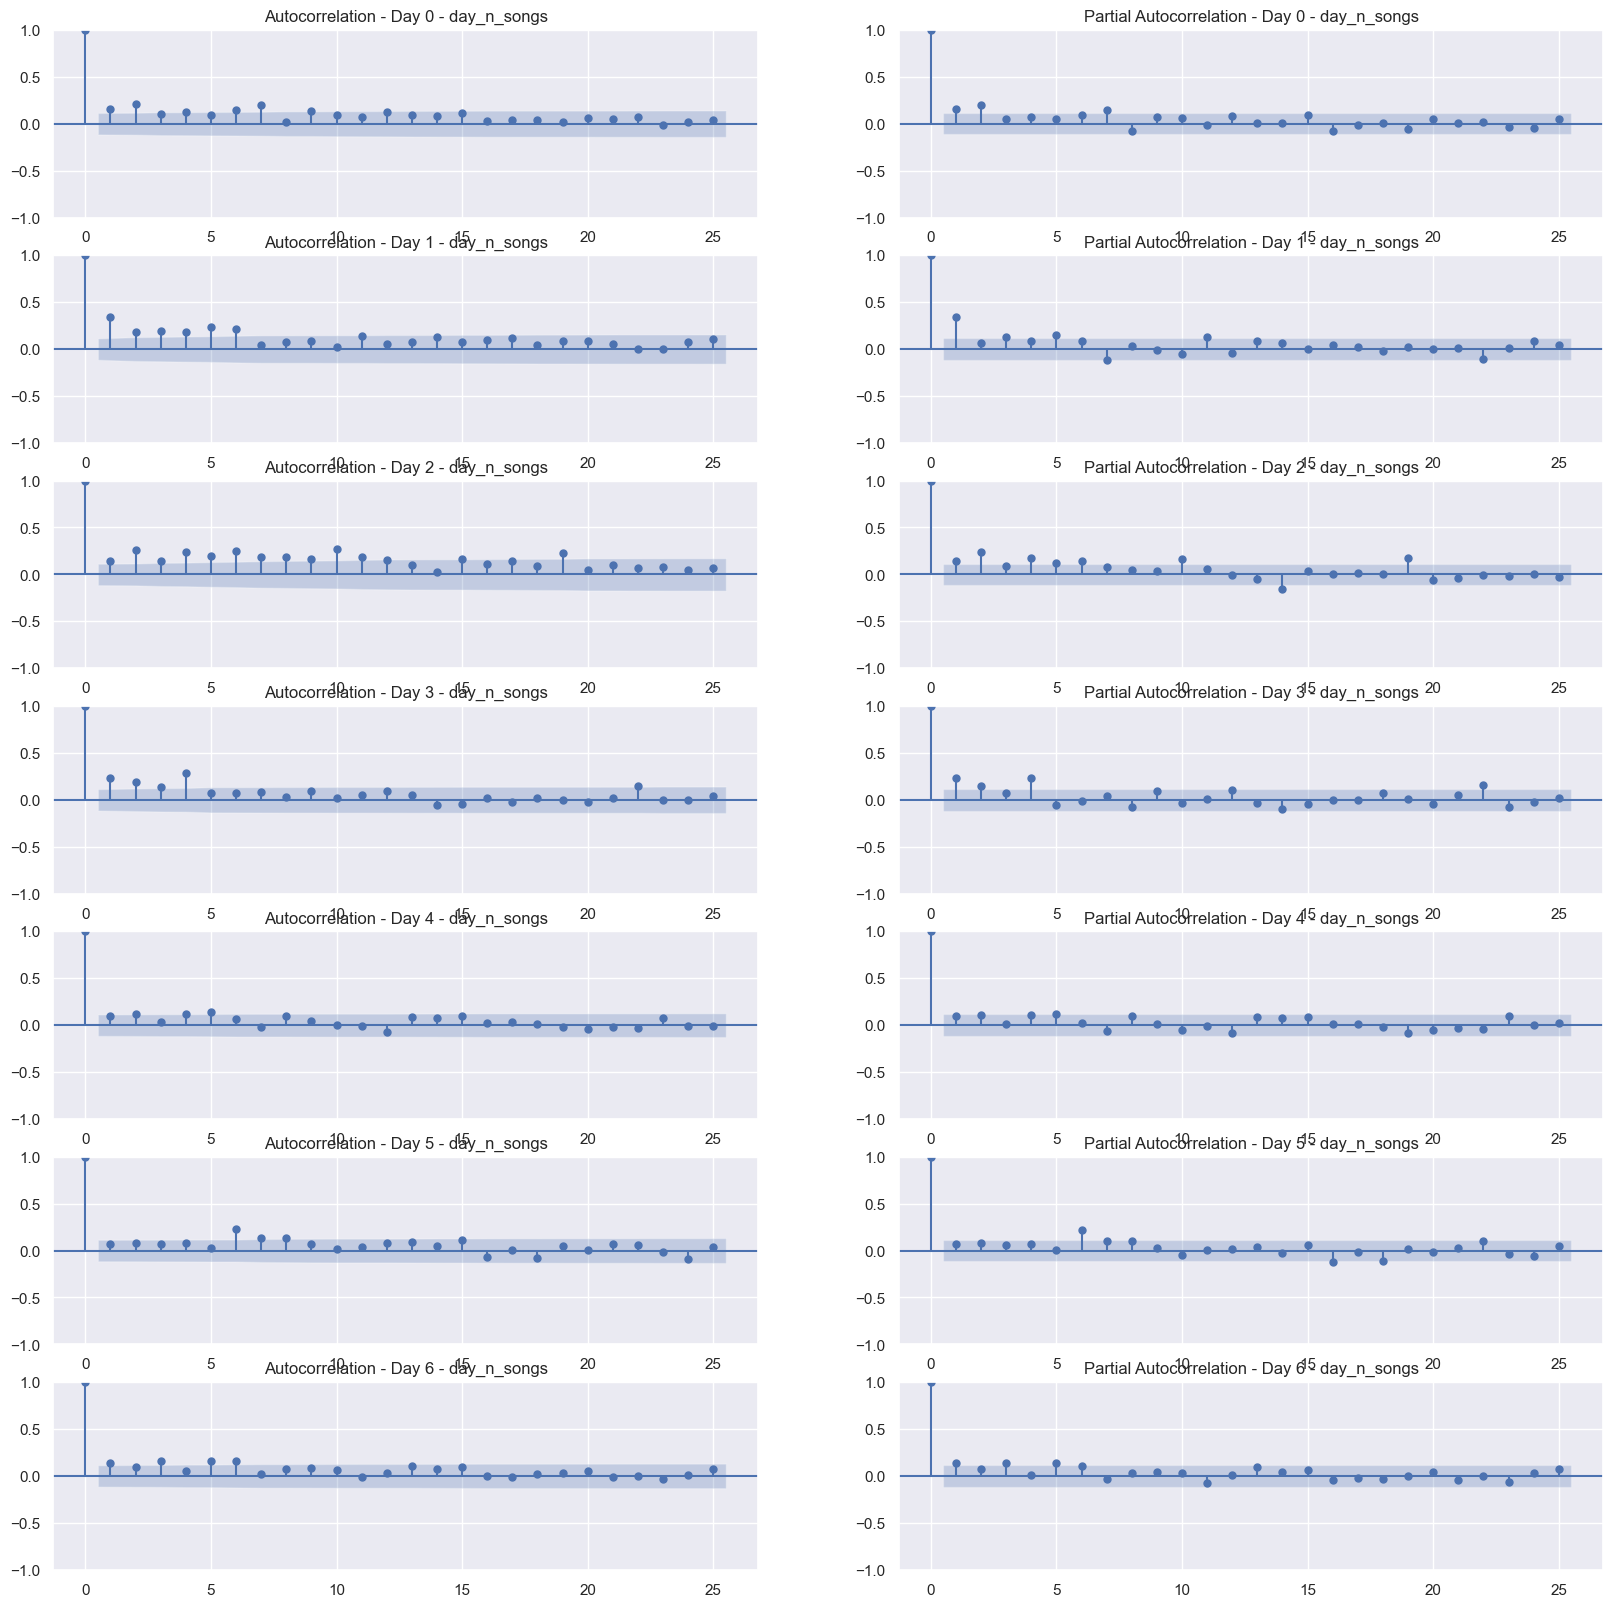

-------------------------------------------- day_n_podcast --------------------------------------------------------------------


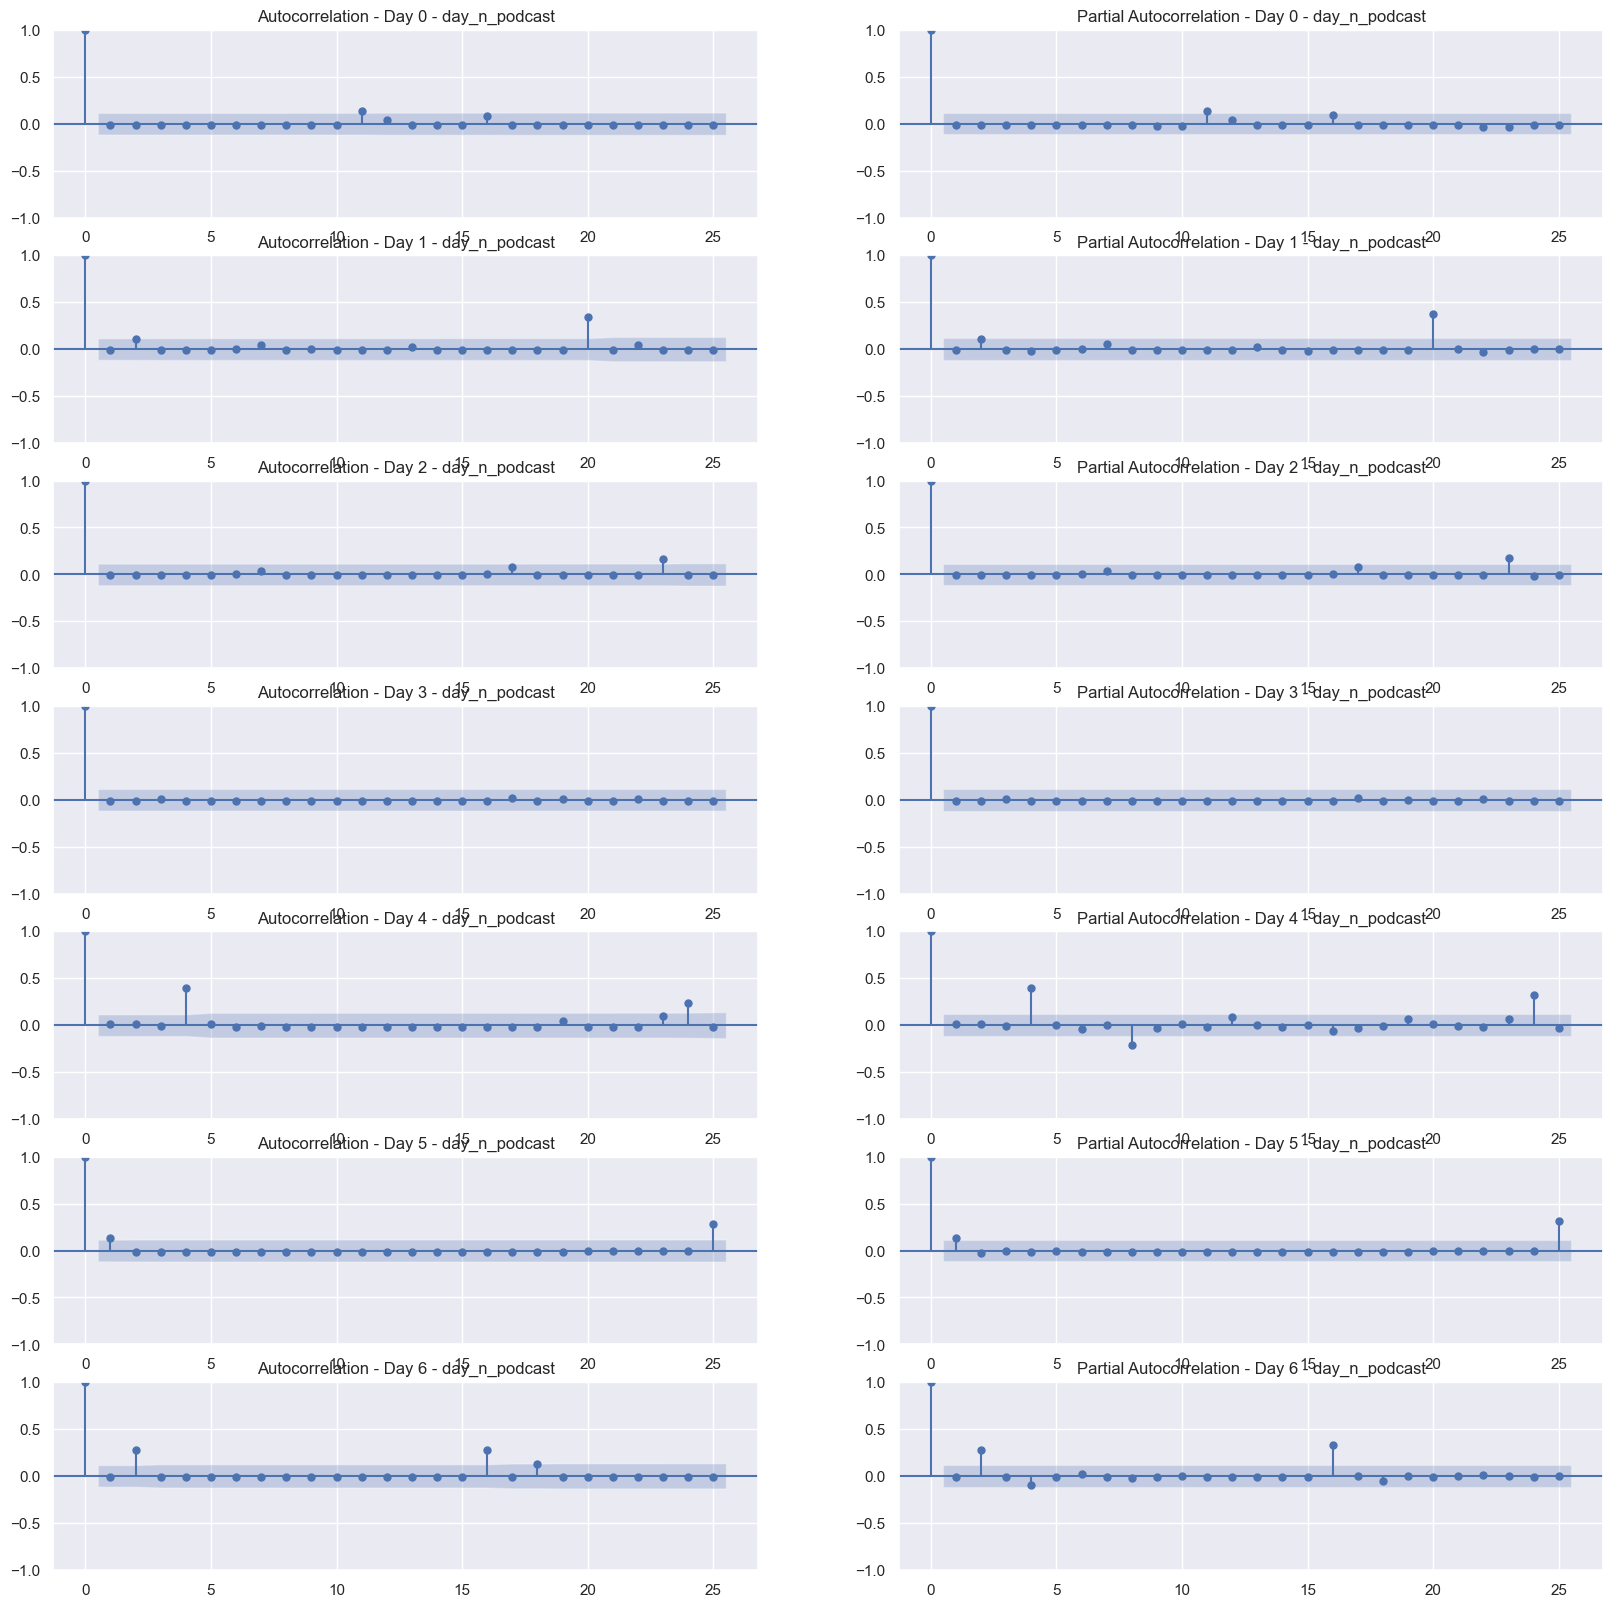

-------------------------------------------- day_new_stream --------------------------------------------------------------------


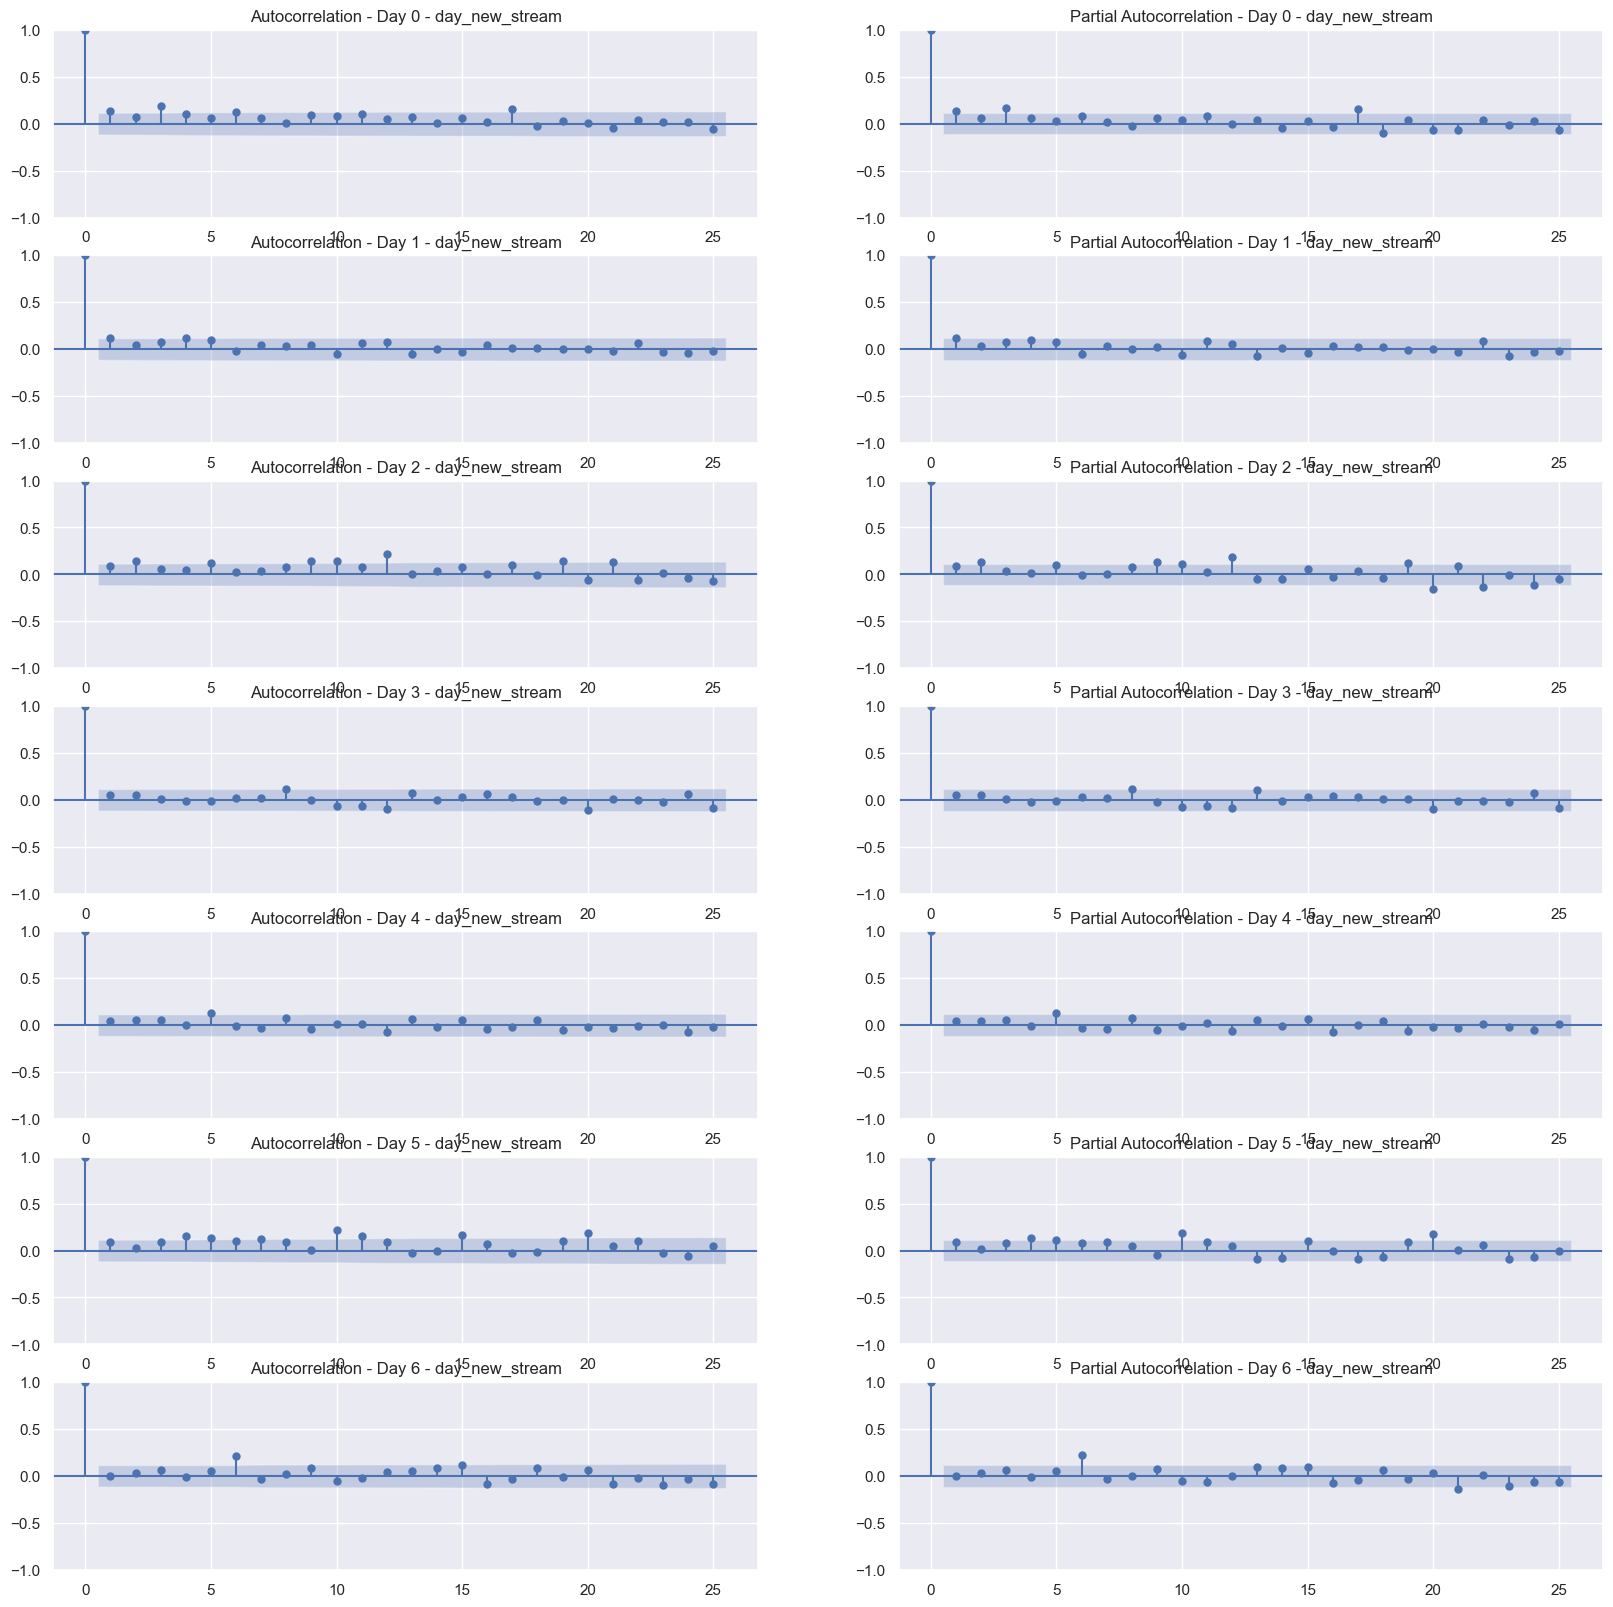

-------------------------------------------- day_new_song --------------------------------------------------------------------


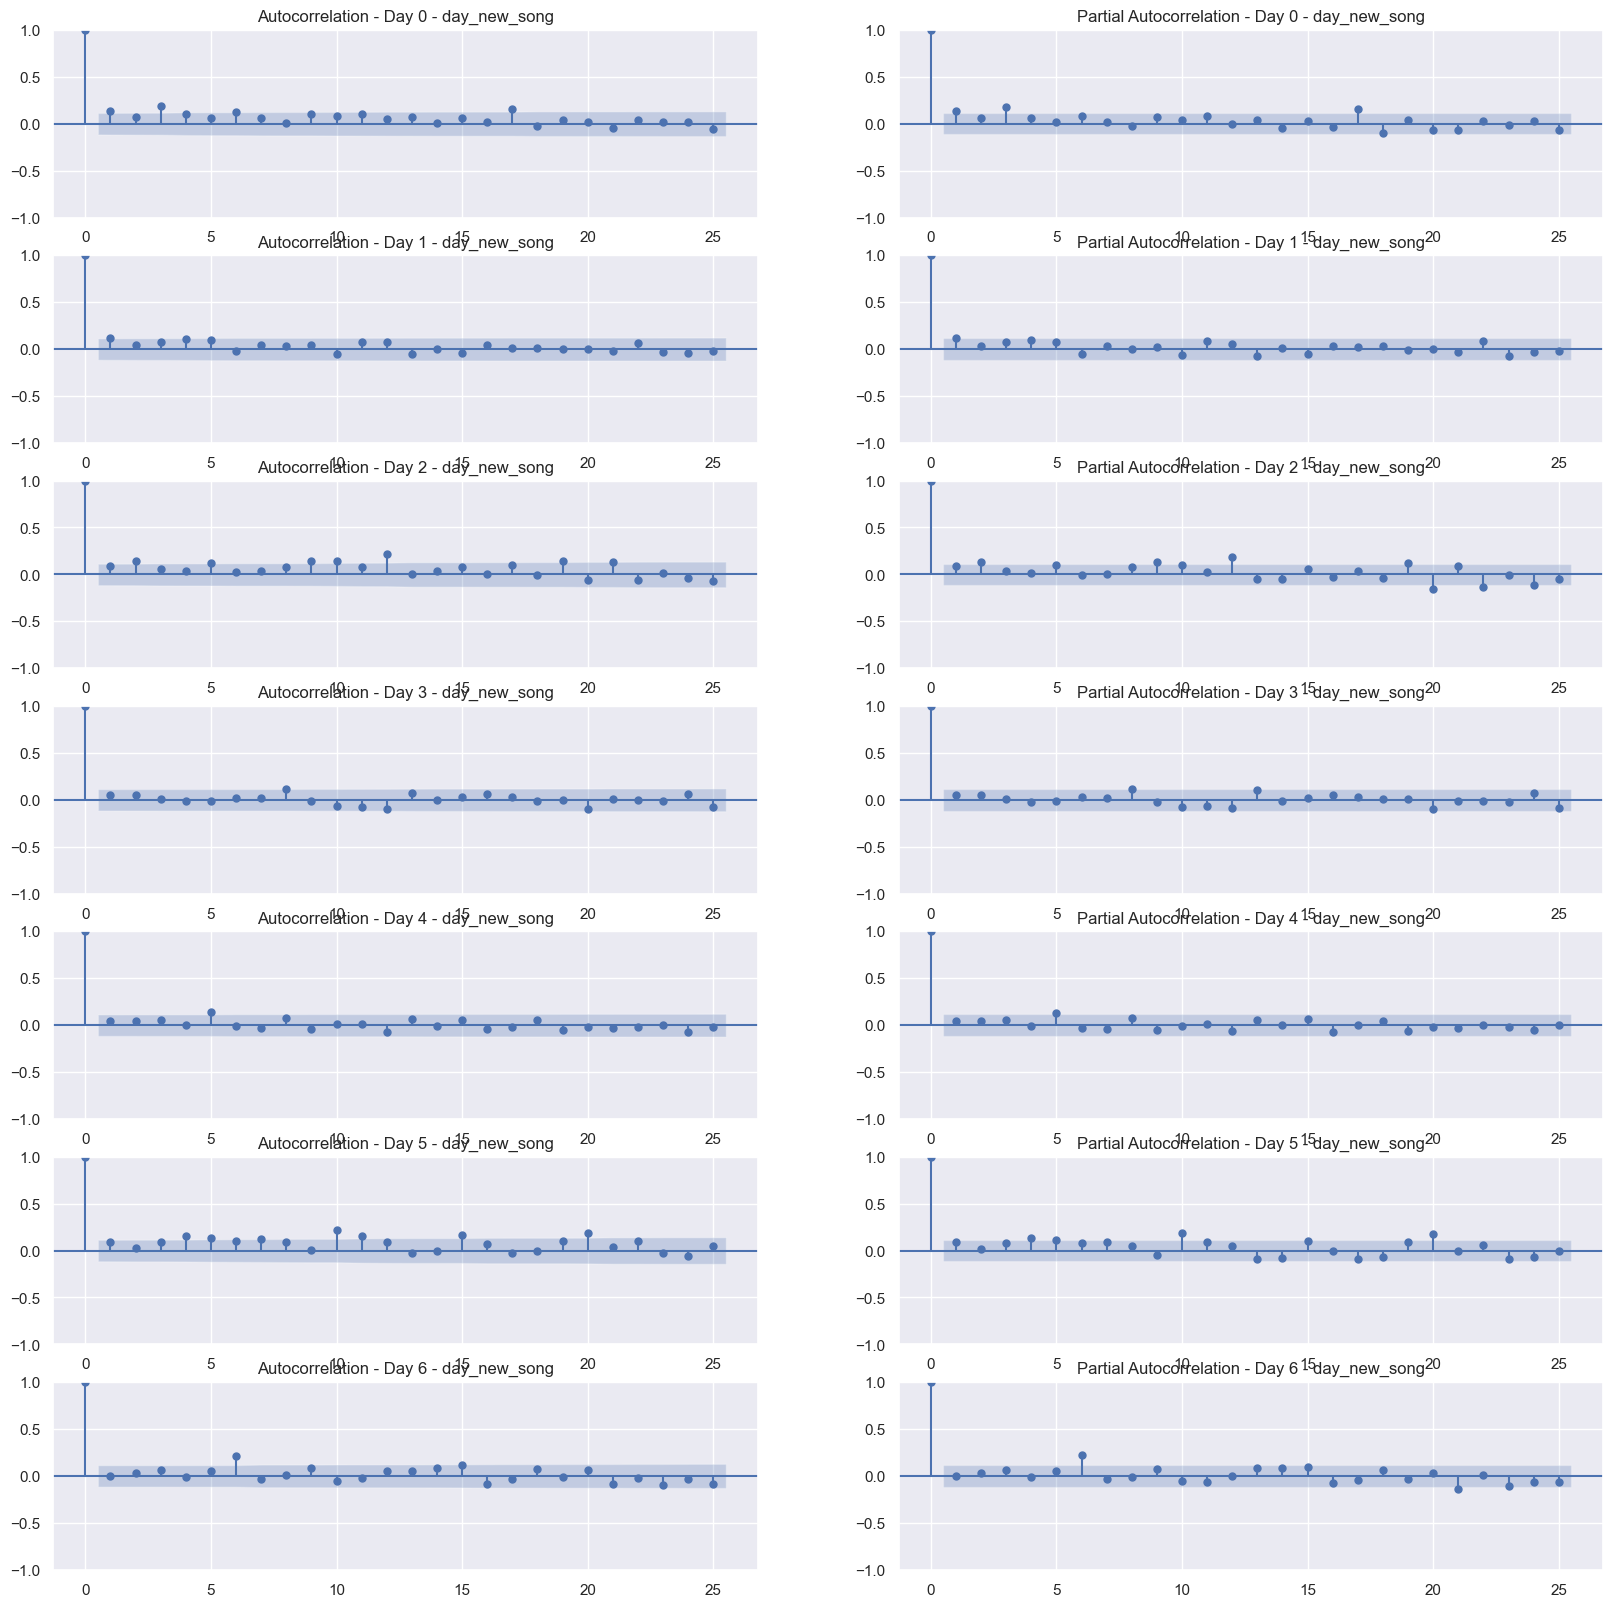

-------------------------------------------- day_new_podcast --------------------------------------------------------------------


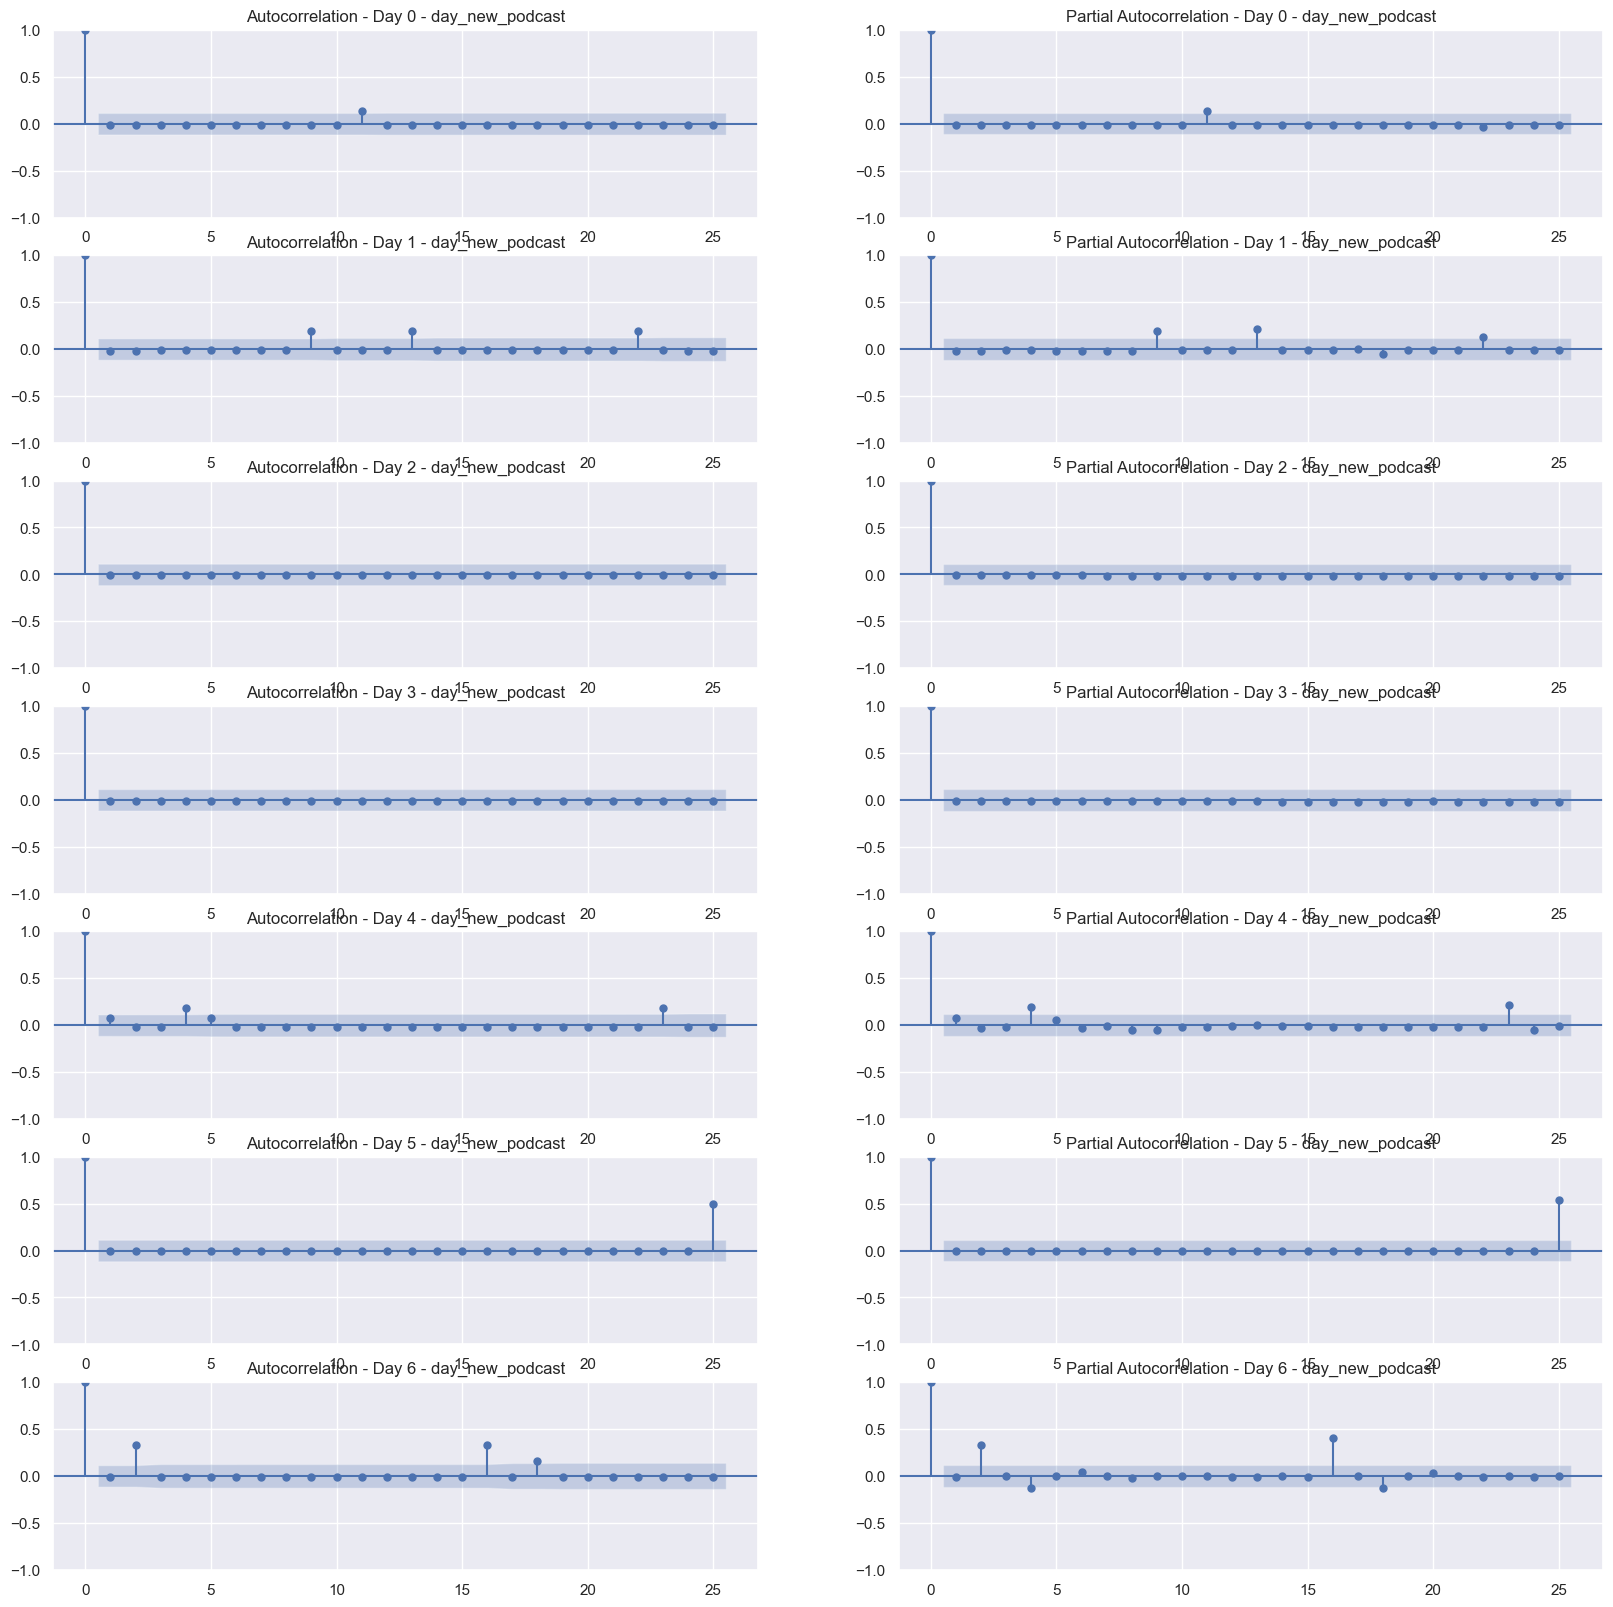

In [150]:
for i in TARGETS:
    print('-------------------------------------------- ' + str(i) + ' --------------------------------------------------------------------')    
    plot_dailies(data = i)

In [151]:
df.drop('week_day', inplace=True, axis=1)

##### It is clearly visible there is no corralation between same dayweeks
- Maybe between hours we can find that correlation in same dayweeks, but between days and the small duration of streams 


### <span style="background:lightgreen"> TESTS <span>

https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

<span style="background:violet"> Test - Functions <span>

In [152]:
#define function for ADF test
def adf_test(timeseries, i, c = 1):
    """
    Perform augmented Dickey-Fuller test and print the results
    """
    if(c == 1):
        print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    
    if(c == 1):
        print (dfoutput)
    
    if(dftest[1] < 0.05):
        if(c == 1):
            print('\n', i, '-- is STATIONARY')
        return 0
    
    else:
        if(c == 1):
            print('\n', i, 'is NOT Stationary')
        return 1

In [153]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries, i, c=1):
    """
    Perform augmented KPSS test and print the results
    """
    
    if c == 1:
        print(f"Results of KPSS Test: -- {i}")
    
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    
    for key, value in kpsstest[3].items():
        kpss_output[f'Critical Value ({key})'] = value
    
    if kpsstest[1] < 0.05:
        result = 0
        message = "-- is STATIONARY"
    else:
        result = 1
        message = "is NOT Stationary"
    
    if c == 1:
        print(kpss_output)
        print(f"\n{i} {message}")
    
    return result
    

#### <span style="background:skyblue"> Dickey-Fuller <span>

In [154]:
#### Dickey Fuller
    # Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    # Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
        # p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

    # p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    # p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
    
    # ADF Statistic < %Percetnajes -- Confidence Rechanzando

In [155]:
fuller_station = []
for i in TARGETS:
    print('------------------------------------------- ' + str(i) + ' -------------------------------------------------------------------')    
    fuller_station.append(adf_test(df[i], i, c = 0))

print(fuller_station)

------------------------------------------- day_n_streams -------------------------------------------------------------------
------------------------------------------- day_n_songs -------------------------------------------------------------------
------------------------------------------- day_n_podcast -------------------------------------------------------------------
------------------------------------------- day_new_stream -------------------------------------------------------------------
------------------------------------------- day_new_song -------------------------------------------------------------------
------------------------------------------- day_new_podcast -------------------------------------------------------------------
[0, 0, 0, 0, 0, 0]


#### <span style="background:skyblue"> KPSS <span>

In [156]:
kpss_station = []

for i in TARGETS:
    print('------------------------------------------- ' + str(i) + ' -------------------------------------------------------------------')    
    kpss_station.append(kpss_test(df[i], i, c = 0))
    
print(kpss_station)

------------------------------------------- day_n_streams -------------------------------------------------------------------
------------------------------------------- day_n_songs -------------------------------------------------------------------
------------------------------------------- day_n_podcast -------------------------------------------------------------------
------------------------------------------- day_new_stream -------------------------------------------------------------------
------------------------------------------- day_new_song -------------------------------------------------------------------
------------------------------------------- day_new_podcast -------------------------------------------------------------------
[0, 0, 0, 1, 1, 0]


### <span style='background :yellow' > Make Serie Stationary: </span>
- Serveral Ways

3. Types of Stationarity
Let us understand the different types of stationarities and how to interpret the results of the above tests.

- Strict Stationary: A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.

- Trend Stationary: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.

- Difference Stationary: A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.

4. Posible Cases:

- Case 1: Both tests conclude that the series is not stationary -> series is not stationary
- Case 2: Both tests conclude that the series is stationary -> series is stationary
- Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
- Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

### <span style="background:lightgreen"> Transform serie to Stationey <span>

<span style="background:violet"> Stationary Transform - Functions <span>

In [157]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [158]:
def run_stationary_test(TARGETS, df):
    fuller_station = []
    kpss_station = []
    for i in TARGETS:
        fuller_station.append(adf_test(df[i], i, 0))
        kpss_station.append(kpss_test(df[i], i, 0))
    
    return fuller_station, kpss_station

In [159]:
def cases(kp = kpss_station, fl = fuller_station, TS = TARGET):
    station = []
    
    for k,f,i in zip(kp, fl, TS):
        if (k == 1 and f == 1):
            #print(i, '-- Case 1: Not Stationary\n')
            station.append(1)
        
        elif(k == 0 and f == 0):
            #print(i, '-- Case 2: Stationary\n')
            station.append(2)
        
        elif(k == 0 and f == 1):
            #print(i, '-- Case 3: Trend Stationary -- Remove Trend for Strict Statinary Serie\n')
            station.append(3)
    
        elif(k == 1 and f == 0):
            #print(i, '-- Case 4: Difference Stationary -- Use differencing to make serie Stationary\n')
            station.append(4)
        
        else:
            print('ERROR')
        
    return station

In [160]:
# In this method, we compute the difference of consecutive terms in the series. 
# Differencing is typically performed to get rid of the varying mean. Mathematically, 
# differencing can be written as:
def differencing(df, i):
    df[i + '_diff'] = df[i] - df[i].shift(1)
    #df[i + '_diff'].dropna().plot(figsize=(12, 8))
    
# In seasonal differencing, instead of calculating the difference between consecutive values, 
# we calculate the difference between an observation and a previous observation from the same season. 
# For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. 
def seasonal_diff(df, i, time = 'd'):
    if time == 'd':
        n=7
    
    elif time == 'h':
        n=24
        
    else:
        print('ERROR')
        return 0
        
    df[i + '_season_diff'] = df[i] - df[i].shift(n)
    
# Transformations are used to stabilize the non-constant variance of a series. 
# Common transformation methods include power transform, square root, and log transform. 
# Let’s do a quick log transform and differencing on our air passenger dataset:
def transformation(df, i):
    df[i + '_log'] = np.log(df[i])
    df[i + '_log_diff'] = df[i + '_log'] - df[i + '_log'].shift(1)
    df[i + '_log_diff'].dropna(inplace = True)
    #train[i + '_log_diff'].dropna()

In [161]:
def to_stationary(station, TARGETS):
    for s,i in zip(station, TARGETS):
        if s == 1:
            #print(i + '-- No Stationary -- Transformation\n')
            transformation(df, i)
        
        elif s == 2:
            #print(i + '-- Stationary -- Continue\n')
            pass
        
        elif s == 3:
            #print(i, '-- Trend Stationary -- Remove Trend for Strict Statinary\n')
            seasonal_diff(df, i , 'd')
        
        elif s == 4:
            #print(i, '-- Difference Stationary -- Use differencing to make serie Stationary\n')
            differencing(df, i)
        
        else:
            print('ERROR')
            return -1

    #print(station)
    df.dropna(inplace=True)
    df.head()
    
    return 0

In [162]:
def modify_Targets(st, TS = TARGET, df = df, no_ts = [], c = 0):
    counter = c
    nt = no_ts.copy()
    TAGS = list(df.columns)
    
    #print('df TAGS -- ', TAGS)
    #print('\n Actual TAGS -- ', TS)
    #print('\t\t\tmodify - target - st = ', st)
    
    for s,i in zip(st, range(len(st))):
        if s != 2:
            nt.append(TS[i])
            counter = counter + 1
            
    #print('\n Remove from df TAGS -- ', nt)
    
    for n in nt:
        TAGS.remove(n)
        
    #print('\n New TAGS --', TAGS)
        
    return TAGS, nt, counter

In [163]:
# Generated Info
i = 0
counter = 0
lp = 3
aux = 1

nt = []
station = []
fuller_station = []
kpss_station = []
tags = []

In [197]:
def recursive_station(df, targets, nt, count, i, loop_condition = aux):
    warnings.simplefilter('ignore')
    print('Original Targets nº', i, targets)
    
    fuller_station, kpss_station = run_stationary_test(targets, df)
    print('fuller result = ', fuller_station)
    print('kpss result = ', kpss_station)
    
    # def cases(kp = kpss_station, fl = fuller_station, TS = TARGETS):
    station = cases(kp = kpss_station, fl = fuller_station, TS = targets).copy()
    print('Cases Station = ', station) # Station = [1,2,2,3,3,4,4]
    
    # If Station = [2,2,2,2,2,2] -- All 2. RETURN / END
    if(sum(station) == len(station)*2):
        print('All Stationary')
        return tags.copy()
    
    # ELSE
    to_stationary(station, targets)
    tags, nt, counter = modify_Targets(st = station, TS = targets, df = df, no_ts = nt, c = count)
    
    print('\nc = ', count)
    print('nt = ', nt)
    print('df.colums = ', list(df.columns))
    print('tags = ', tags)
    print('targets = ', targets)
    #fuller_station, kpss_station = run_stationary_test(tags, df)
    
    if(loop_condition == lp):
        print('\n______________________________Ended Manualy______________________________\n')
        print('tags', tags)
        return tags
    
    elif(sum(fuller_station) >=1 or sum(kpss_station)>= 1):
        print('----------------------- iteration number º ', i, ' ------------------------------')
        i = i+1
        
        print('TARGETS = ', targets)
        print('____________________________________________________________________________________________________')
        print('____________________________________________________________________________________________________\n')
        
        loop_condition = loop_condition + 1
        tags = recursive_station(df, tags, nt, count, i, loop_condition)
        
    else:
        return tags
    
    return tags

In [ ]:
def clean_targets(df, tags):
    df = df[tags]
    return df

#### <span style="background:skyblue"> Make It Work <span>

In [198]:
ts = recursive_station(df, TARGETS, nt, counter, i)
print('____________________________ TARGETS -- \n', ts, '\n')

Original Targets nº 0 ['day_n_streams', 'day_n_songs', 'day_n_podcast', 'day_new_stream', 'day_new_song', 'day_new_podcast']
fuller result =  [0, 0, 0, 0, 0, 0]
kpss result =  [0, 0, 0, 1, 1, 0]
Cases Station =  [2, 2, 2, 4, 4, 2]

c =  0
nt =  ['day_new_stream', 'day_new_song']
df.colums =  ['day_n_streams', 'day_n_songs', 'day_n_podcast', 'day_new_stream', 'day_new_song', 'day_new_podcast', 'day_new_stream_diff', 'day_new_song_diff']
tags =  ['day_n_streams', 'day_n_songs', 'day_n_podcast', 'day_new_podcast', 'day_new_stream_diff', 'day_new_song_diff']
targets =  ['day_n_streams', 'day_n_songs', 'day_n_podcast', 'day_new_stream', 'day_new_song', 'day_new_podcast']
----------------------- iteration number º  0  ------------------------------
TARGETS =  ['day_n_streams', 'day_n_songs', 'day_n_podcast', 'day_new_stream', 'day_new_song', 'day_new_podcast']
____________________________________________________________________________________________________
________________________________

In [199]:
ts

['day_n_streams',
 'day_n_songs',
 'day_n_podcast',
 'day_new_podcast',
 'day_new_stream_diff_diff_diff',
 'day_new_song_diff_diff_diff']

In [200]:
print(df.head(1))
df = clean_targets(df, ts)
df.head(1)

            day_n_streams  day_n_songs  day_n_podcast  day_new_stream  \
2017-04-07             45           45              0               0   

            day_new_song  day_new_podcast  day_new_stream_diff  \
2017-04-07             0                0                  0.0   

            day_new_song_diff  day_new_stream_diff_diff  \
2017-04-07                0.0                       0.0   

            day_new_song_diff_diff  day_new_stream_diff_diff_diff  \
2017-04-07                     0.0                            0.0   

            day_new_song_diff_diff_diff  
2017-04-07                          0.0  


day_n_streams  day_n_songs  day_n_podcast  day_new_podcast  \
2017-04-07             45           45              0                0   

            day_new_stream_diff_diff_diff  day_new_song_diff_diff_diff  
2017-04-07                            0.0                          0.0

https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322

# <span style='background :khaki' > Save </span>

In [203]:
df.head()

day_n_streams  day_n_songs  day_n_podcast  day_new_stream  \
2017-04-04             66           66              0               0   
2017-04-05            123          123              0               0   
2017-04-06             63           63              0               0   
2017-04-07             45           45              0               0   
2017-04-08             56           56              0               0   

            day_new_song  day_new_podcast  
2017-04-04             0                0  
2017-04-05             0                0  
2017-04-06             0                0  
2017-04-07             0                0  
2017-04-08             0                0

In [204]:
# Rest Types DF
df.to_json(r"C:\Users\ghoyo\Desktop\TFM 3.0\Project\GeneratedDfs\dayly_stational.json")

In [201]:
df = pd.read_json(data2)
df.drop('week_day', inplace=True, axis=1)

In [ ]:
# Calcular la varianza
variance = df['variable'].var()

# Calcular la desviación estándar
standard_deviation = df['variable'].std()

# Calcular el coeficiente de variación (CV)
mean = df['variable'].mean()
coefficient_of_variation = standard_deviation / mean

print("Varianza:", variance)
print("Desviación estándar:", standard_deviation)
print("Coeficiente de variación:", coefficient_of_variation)

In [ ]:
variance = []
std = []
var_coef = []

for t in TARGET:
    # Calcular la varianza
    variance.append(df[t].var())
    
    # Calcular la desviación estándar
    std.append(df[t].std())

    # Calcular el coeficiente de variación (CV)
    mean = df[t].mean()
    var_coef.append(std[-1]/ mean)
    